# <center> Майнор "Интеллектуальный анализ данных" </center>

# <center> Курс "Введение в анализ данных" </center>

# <center> Лабораторная работа №2. Кластерный анализ. </center>

# Часть 1

В данном задании вам необходимо **самостоятельно** реализовать один из алгоритмов кластеризации.  
По аналогии с классами в scikit-learn, нужно реализовать класс, наследуемый от [Base Estimator](https://scikit-learn.org/stable/modules/generated/sklearn.base.BaseEstimator.html).  
Подробнее про реализацию своих моделей в scikit-learn: [here](https://scikit-learn.org/stable/developers/develop.html#rolling-your-own-estimator).  
В классе помимо `__init__()` нужно реализовать два метода:
 - `fit()` - метод, выполняющий кластеризацию данных.
 - `predict()` - метод, определяющий для нового объекта, к какому из кластеров он относится. 
 
Для удобства можно создавать дополнительные методы класса, которые будут вызываться в `fit()` или `predict()`.  <br>
Функции для вычисления расстояний *между объектами* самим реализовывать не нужно, используйте реализации из `scipy`.

In [70]:
from sklearn.base import BaseEstimator, ClusterMixin
from scipy.spatial import distance
from collections import defaultdict #чтоб по красоте создавать словарик
import numpy as np

class My_Clust(BaseEstimator, ClusterMixin):
    
    def __init__(self, n_clusters=3, max_iter=300, tol=1e-4, n_init=10, init='random'):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.tol = tol
        self.n_init = n_init
        self.init = init

# подгоняем данные под нужный формат
    def _transform_df(self, X):
        if isinstance(X, pd.core.frame.DataFrame):
            X = X.to_numpy()
        if isinstance(X, list):
            X = np.asarray(X)    
        return X
    
# генерируем рандомные точки, которые будут центрами (метод kmeans++ решил не брать)    
    def _gen_randon_centers(self, X):
        centers = np.zeros((self.n_clusters, X.shape[1]))
        for i in range(self.n_clusters):
            center = X[np.random.choice(X.shape[0])]
            centers[i] = center
        return centers
    
# пересчетитываем центры, вычислением среднего значения   
    def _recalc_centers(self, X, clust):
        centers = np.zeros((self.n_clusters, X.shape[1]))
        for idx, clust in enumerate(clust):
            new_center = np.mean(X[clust], axis=0)
            centers[idx] = new_center
        return centers
        
# выделяем класстеры    
    def _gen_clust(self, X,centers):
        iner = 0
        clust = [[] for _ in range(self.n_clusters)]
        for idx_point, point in enumerate(X):
            dist = np.linalg.norm(point - centers, ord=2, axis=1) # расстояние от точек до центров
            closest_center = np.argmin(dist) #индекс минимального значения
            clust[closest_center].append(idx_point) # добавляем в нужный кластер индекс точки
            iner += dist[closest_center] # высчитывание инерции
        return clust, iner
    
#получаем лейбл, к которому относится точка 
    def _get_labels(self, X, clust):
        labels = np.zeros(X.shape[0])
        for idx, cluster in enumerate(clust):
            for i in cluster:
                labels[i] = idx  
        return labels
     
    def fit(self, X):
        centers = self._gen_randon_centers(X) 
        X = self._transform_df(X)
        iners = defaultdict(list) # значение инерции на каждой итерации
        centers_1 = defaultdict(list) # будем добавлять центры для каждой итерации
        clusts = defaultdict(list) # кластеры для каждой итерации
        
        for i in range(self.n_init):
            for j in range(self.max_iter):
                clust, iner = self._gen_clust(X, centers) 
                old_centers = centers
                centers = self._recalc_centers(X, clust)
                differ = np.linalg.norm(centers - old_centers)
                if not differ.any() or differ < self.tol: # если, вдруг, пересчет центров дал тот же результат, то выходим из цикла
                    iners[i].append(i)
                    break
            iners[i].append(iner)
            centers_1[i].append(centers)
            clusts[i].append(clust)
        
        iner = min(iners.items(), key = lambda x: x[1])[1] # инерция - минимальное число из всех итераций
        centers = centers_1[min(iners.items(), key = lambda x: x[1])[0]] # центры, когда получилась лучшая инерция
        self.clust = clusts[min(iners.items(), key = lambda x: x[1])[0]] # последнее лучшее разбиение
        
        
        labels = self._get_labels(X, clust)        
        self.labels_ = labels.astype('str') #чтобы на графике было все ярко и четко
        self.cluster_centers_ = centers
        self.inertia_ = iner
        return self
    
    def predict(self, X):
        return self.labels_

In [75]:
Z = My_Clust(n_clusters = 3).fit(X)
Z.predict(X)

array(['2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0',
       '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0',
       '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0',
       '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0',
       '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0',
       '2.0', '2.0', '2.0', '2.0', '2.0', '0.0', '0.0', '1.0', '0.0',
       '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0',
       '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0',
       '0.0', '0.0', '0.0', '0.0', '0.0', '1.0', '0.0', '0.0', '0.0',
       '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0',
       '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0',
       '0.0', '1.0', '0.0', '1.0', '1.0', '1.0', '1.0', '0.0', '1.0',
       '1.0', '1.0', '1.0', '1.0', '1.0', '0.0', '0.0', '1.0', '1.0',
       '1.0', '1.0', '0.0', '1.0', '0.0', '1.0', '0.0', '1.0', '1.0',
       '0.0', '0.0',

### Вариант №3

Алгоритм K-Means.  
  
Параметры: 
- **k:** число центров (кластеров);
- **init**: метод инициализации центров - random или kmeans++;
- **n_init**: число запусков алгоритма;
- **max_iter:** максимальное число итераций;  
- **tol:** минимальное значение изменения целевой функции.  
  
Атрибуты:  
- **inertia_:** Итоговое значение целевой функции;
- **cluster\_centers\_:** центры кластеров - ndarray of shape (n_clusters, n_features);
- **labels_:** метки кластеров для каждого объекта.  
  
Метод `predict()`:  Новый объект определяется в кластер, центр которого расположен ближе всех к этому объекту. 

### Тестирование 

Вашу реализацию необходимо сравнить с питоновской реализацией алгоритма из `sklearn` или `scipy`. Результаты кластеризации должны совпадать.  
Также необходимо сравнить скорость работы вашей реализации и питоновской (это нормально, если ваша реализация будет медленнее).  
Сравнение необходимо выполнить на наборе данных iris.

In [5]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
iris = load_iris()
X = iris.data # использовать для кластеризации
y = iris.target # истинные метки цветков

In [7]:
df = pd.DataFrame(X, columns=iris.feature_names)
df['class'] = [iris.target_names[i] for i in y]

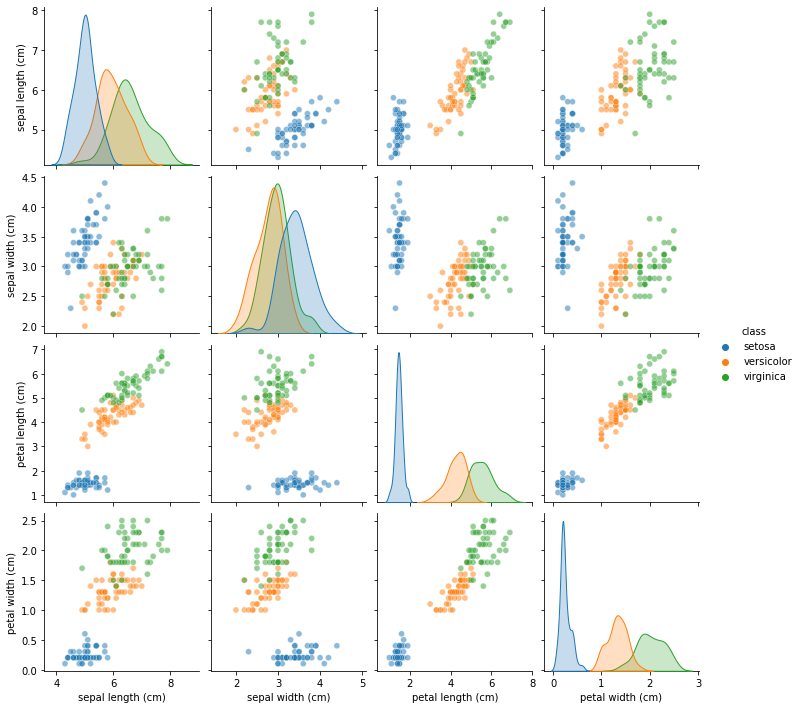

In [8]:
sns.pairplot(df, hue='class', plot_kws={'alpha':0.5}, vars=iris.feature_names)
plt.show()

In [76]:
df['My_Clust'] = Z.predict(X)

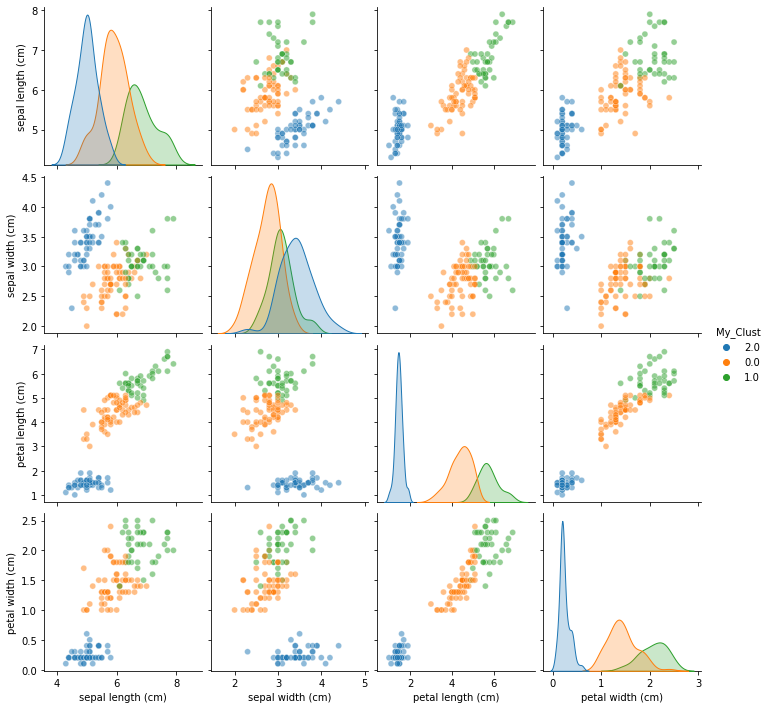

In [77]:
sns.pairplot(df, hue='My_Clust', plot_kws={'alpha':0.5}, vars=iris.feature_names)
plt.show()

**Вывод:** Ну один в один выходит раскидалось. 

### Бонусное  
  
Дополнительно вы можете поработать над эффективностью алгоритма по скорости и памяти, добавить поддержку многопоточности, или расширить базовый функционал.

# Часть 2

В данном задании вам предлагается проанализировать набор данных по различным городам США. Каждый город характеризуется следующими признаками:

In [181]:
from sklearn import preprocessing
stand_scaler = preprocessing.StandardScaler()
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
import hdbscan
from sklearn import metrics

In [9]:
pd.set_option('display.max_colwidth', None)

In [10]:
data_desc = pd.read_csv('Data_Description.txt', sep=':')
data_desc

,Attribute,Description
0,Place,"City, state (postal code)"
1,Climate & Terrain,"Very hot and very cold months, seasonal temperature variation, heating- and cooling-degree days, freezing days, zero-degree days, ninety-degree days."
2,Housing,"Utility bills, property taxes, mortgage payments."
3,Health Care & Environment,"Per capita physicians, teaching hospitals, medical schools, cardiac rehabilitation centers, comprehensive cancer treatment centers, hospices, insurance/hospitalization costs index, flouridation of drinking water, air pollution."
4,Crime,"Violent crime rate, property crime rate."
5,Transportation,"Daily commute, public transportation, Interstate highways, air service, passenger rail service."
6,Education,"Pupil/teacher ratio in the public K-12 system, effort index in K-12, accademic options in higher education."
7,The Arts,"Museums, fine arts and public radio stations, public television stations, universities offering a degree or degrees in the arts, symphony orchestras, theatres, opera companies, dance companies, public libraries."
8,Recreation,"Good restaurants, public golf courses, certified lanes for tenpin bowling, movie theatres, zoos, aquariums, family theme parks, sanctioned automobile race tracks, pari-mutuel betting attractions, major- and minor- league professional sports teams, NCAA Division I football and basketball teams, miles of ocean or Great Lakes coastline, inland water, national forests, national parks, or national wildlife refuges, Consolidated Metropolitan Statistical Area access."
9,Economics,"Average household income adjusted for taxes and living costs, income growth, job growth."


### Notes:   
* Для всех признаков, кроме трех, чем выше значение - тем лучше. Для признаков `Housing` и `Crime` - наоборот.
* Признак `Population`- статистический признак, не имеющий интерпретации как “лучше-хуже”.
* Признак `Place` - уникальный идентификатор объекта (города), он не должен использоваться при кластеризации.
* Также в данных присутствуют географические координаты городов - `Longitude` и `Latitude`. Их также не следует использовать при кластеризации данных.

In [11]:
data = pd.read_csv('Data.txt', sep=' ')
data

,Place,Climate,HousingCost,HlthCare,Crime,Transp,Educ,Arts,Recreat,Econ,Long,Lat,Pop
0,"Abilene,TX",521,6200,237,923,4031,2757,996,1405,7633,-99.6890,32.5590,110932
1,"Akron,OH",575,8138,1656,886,4883,2438,5564,2632,4350,-81.5180,41.0850,660328
2,"Albany,GA",468,7339,618,970,2531,2560,237,859,5250,-84.1580,31.5750,112402
3,"Albany-Schenectady-Troy,NY",476,7908,1431,610,6883,3399,4655,1617,5864,-73.7983,42.7327,835880
4,"Albuquerque,NM",659,8393,1853,1483,6558,3026,4496,2612,5727,-106.6500,35.0830,419700
...,...,...,...,...,...,...,...,...,...,...,...,...,...
324,"Worcester,MA",562,8715,1805,680,3643,3299,1784,910,5040,-71.7950,42.2720,402918
325,"Yakima,WA",535,6440,317,1106,3731,2491,996,2140,4986,-120.5130,46.5950,172508
326,"York,PA",540,8371,713,440,2267,2903,1022,842,4946,-76.7280,39.9600,381255
327,"Youngstown-Warren,OH",570,7021,1097,938,3374,2920,2797,1327,3894,-80.7290,41.1700,531350


<br>  
  
## Задания: 

1. Выполните необходимую предобработку данных. Перед кластеризацией исключите из данных признаки `Place`, `Long` и `Lat`.  
  
  
2. Выполните кластеризацию иерархическим методом.  
Рассмотрите различные расстояния между объектами. Определите, какие следует использовать при кластеризации.  
Выполните кластеризацию с различными расстояниями между кластерами. Сравните результаты, сделайте выводы. 
  
  
3. Выполните кластеризацию методом Dbscan. Используйте расстояния между объектами, определенные в предыдущем пункте.  
Реализуйте эвристику (см. лекции) для выбора параметров алгоритма. Подберите подходящие параметры алгоритма.  
  
  
4. Выполните кластеризацию методом kmeans. Определите наилучшее (на ваш взгляд) число кластеров.  
  
  
5. (Бонусное) Выполните кластеризацию другими методами. Например, [HDBSCAN](https://hdbscan.readthedocs.io/en/latest/) или алгоритмы, [реализованные](https://scikit-learn.org/stable/modules/clustering.html) в scikit-learn.  
  
  
6. В результате выполнения предыдущих пунктов вы должны получить 4 или больше разбиений объектов (по одному на каждый метод). Сравните их между собой, сделайте выводы о сходствах и различиях.  
Оцените результаты каждой кластеризации, используя метрики, рассмотренные на занятиях (Silhouette и прочие).  
  
  
7. Выберите одно разбиение, наиболее подходящее на ваш взгляд. Предложите интерпретацию полученным кластерам или покажите, что этого сделать нельзя.  
  
  
8. Оцените, как полученные кластеры распределены географически.  
Оцените, как полученные кластеры распределены по штатам. Можно ли выделить какую-то зависимость (территориальную или для штатов)?  
(Бонусное) [Провизуализируйте](https://python-visualization.github.io/folium/quickstart.html) распределение на карте США.

# Задание 1

Выполните необходимую предобработку данных. Перед кластеризацией исключите из данных признаки Place, Long и Lat.

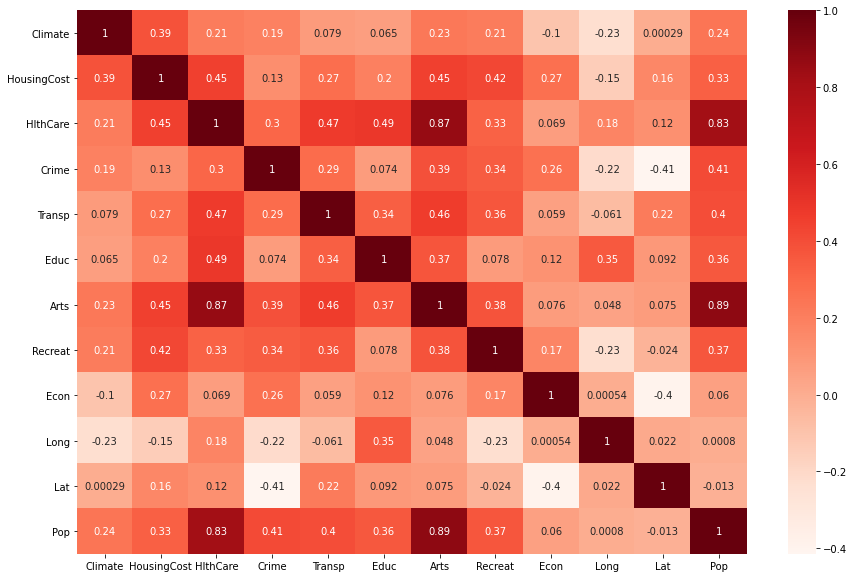

In [12]:
corr_map = data.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(corr_map, annot=True, cmap='Reds')
plt.show()

Хорошо видна корреляция между Arts, HealthCare и Pop (Наверное, чем выше population, тем лучше Healthcare и выше Arts)

Сделаем стандартизацию и нормализацию данных.

In [13]:
df = data.drop(['Long', 'Lat', 'Place'], axis =1) #данные не влияющие на кластеризацию
data_scaled = stand_scaler.fit_transform(df)  
data_normalized = pd.DataFrame(preprocessing.normalize(data_scaled))
data_for_clust = data_normalized

# Задание 2

Выполните кластеризацию иерархическим методом.
Рассмотрите различные расстояния между объектами. Определите, какие следует использовать при кластеризации.
Выполните кластеризацию с различными расстояниями между кластерами. Сравните результаты, сделайте выводы.

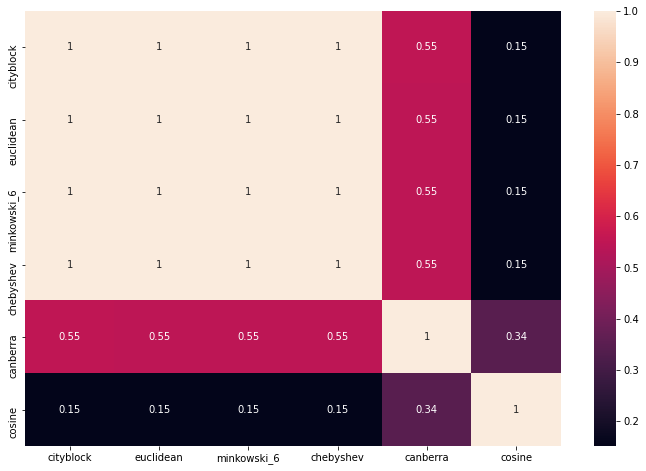

In [14]:
Dist = pd.DataFrame({
     'euclidean': pdist(df, 'euclidean'),
     'cityblock': pdist(df, 'cityblock'),
     'minkowski_6': pdist(df, 'minkowski', p=6),
     'cosine': pdist(df, 'cosine'),
     'chebyshev': pdist(df, 'chebyshev'),
     'canberra': pdist(df, 'canberra')})
Dist_corr = Dist.corr().loc[['cityblock', 'euclidean', 'minkowski_6', 'chebyshev', 'canberra', 'cosine'],
                      ['cityblock', 'euclidean', 'minkowski_6', 'chebyshev', 'canberra', 'cosine']
                     ]
plt.figure(figsize=(12, 8))
sns.heatmap(Dist_corr, annot=True)
plt.show()

По графику видно, что cityblock, euclidean, minkowski_6 и chebyshev коррелируются одинаково, поэтому имеет смысл взять только одну из них. Тогда возьмем euclidian, canberra и cosine.

**Метод Варда**

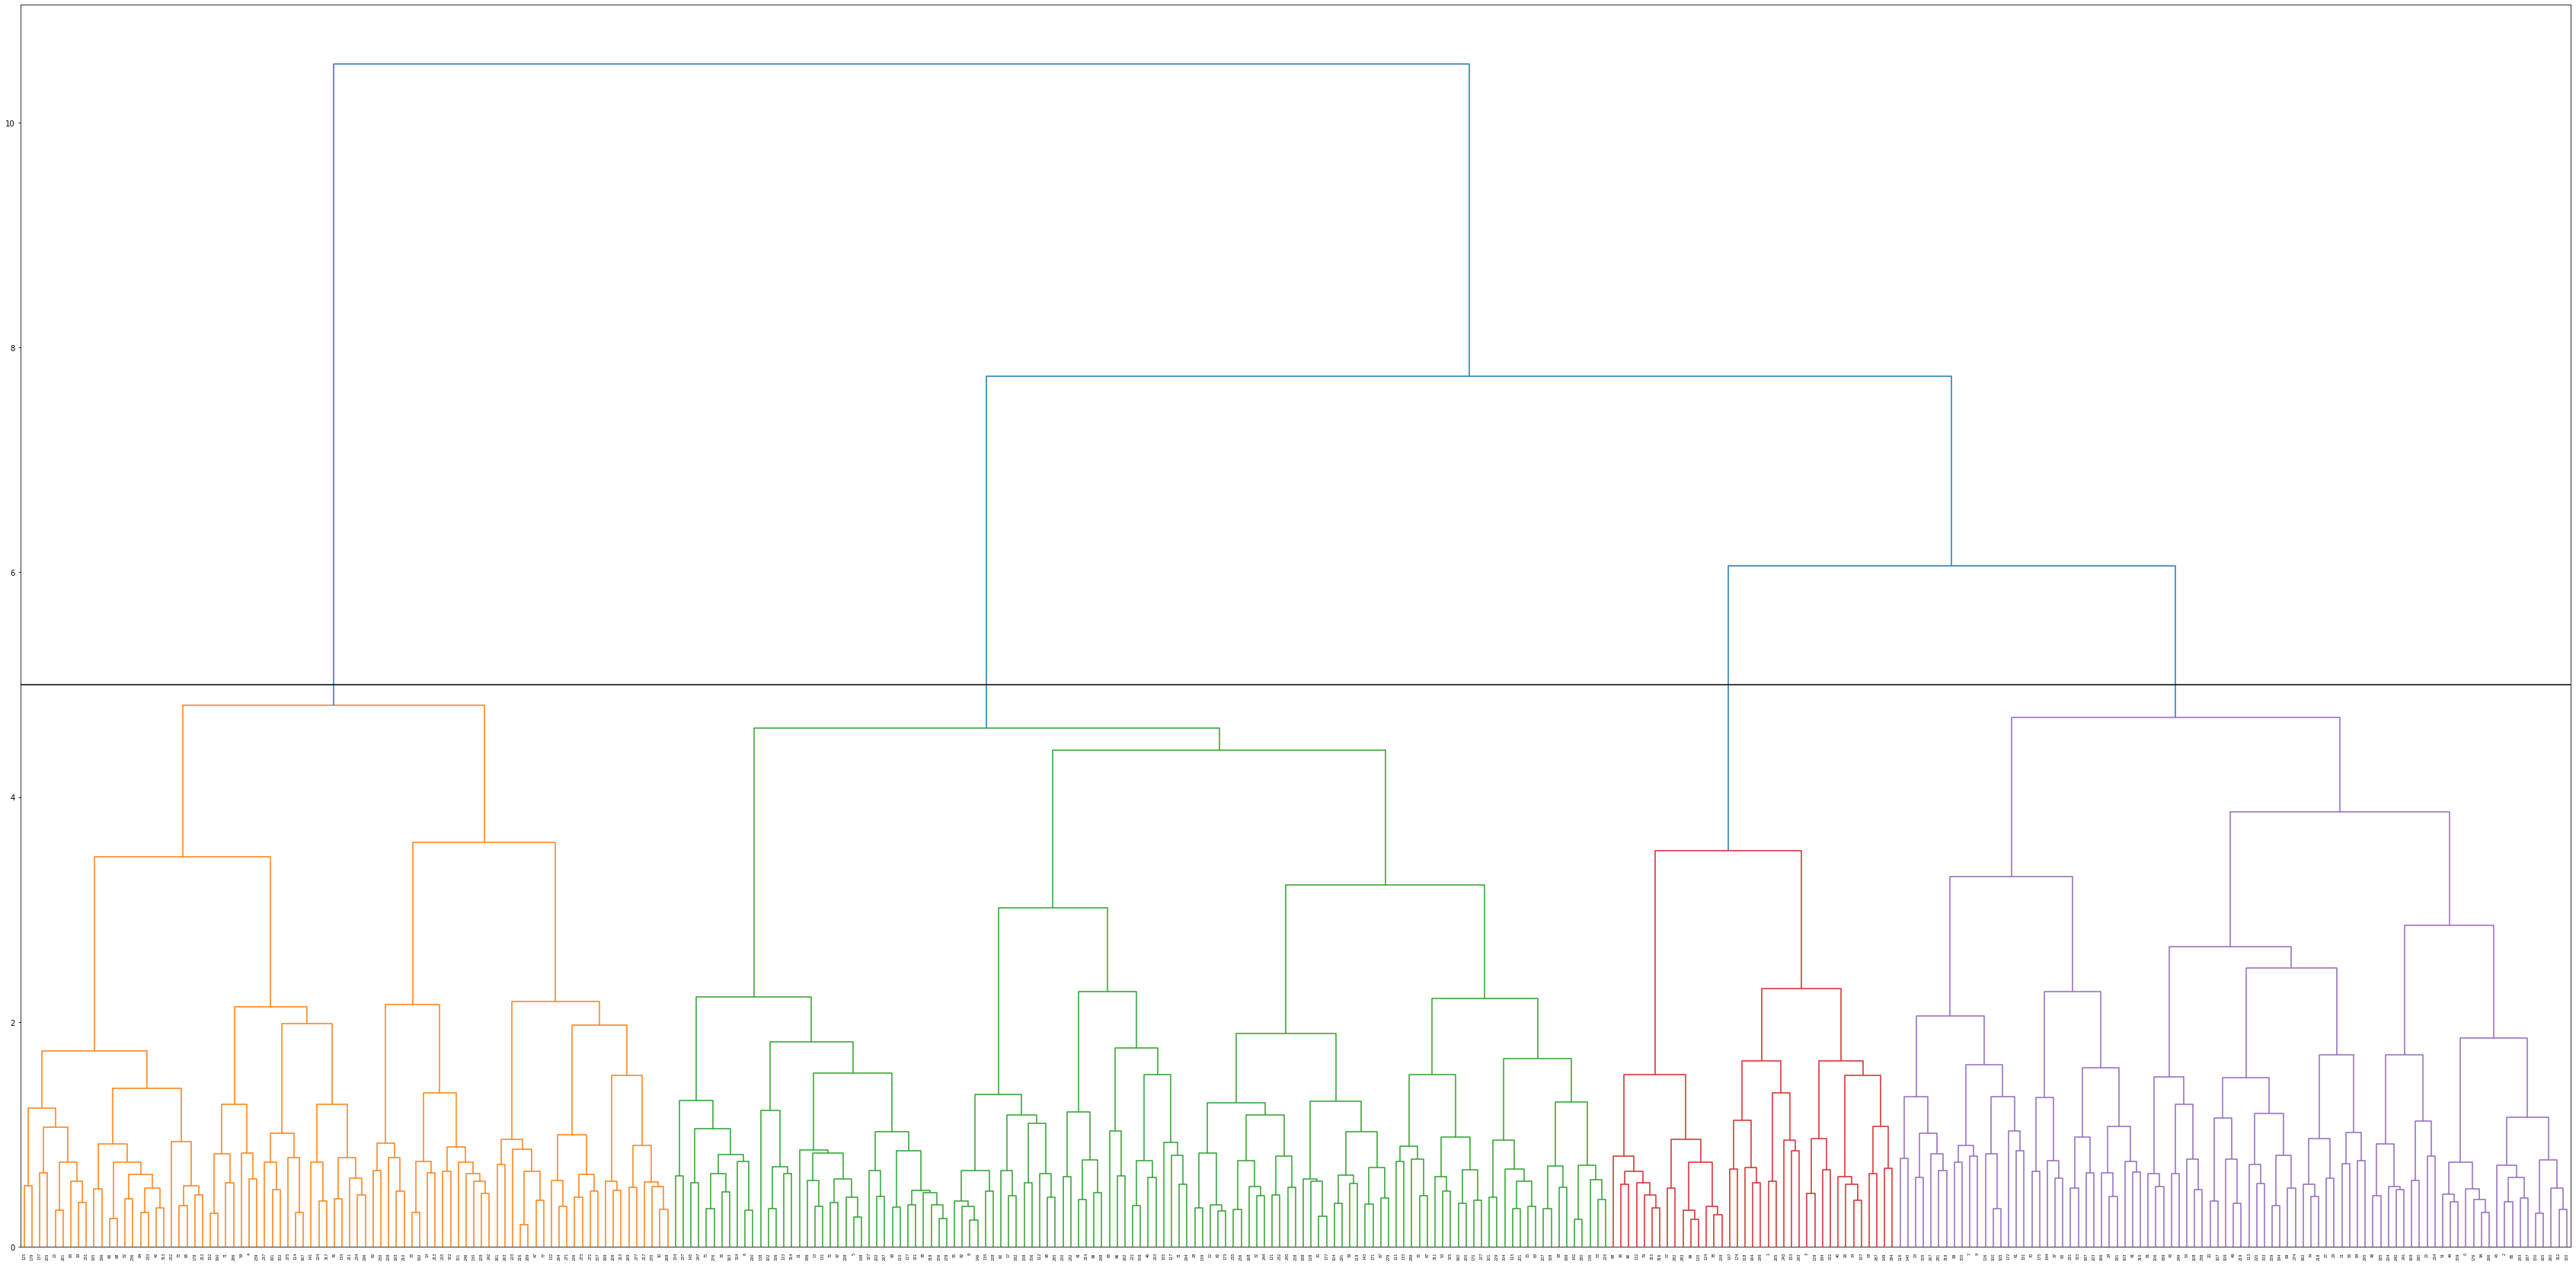

In [15]:
Z_ward = linkage(data_for_clust, method='ward')

plt.figure(figsize=(60, 30))
dendrogram(Z_ward, color_threshold=5)
plt.axhline(y=5, c='k')
plt.show()


Хорошо выделяются 4 кластера.

In [16]:
#Сделаем столбец в исходном датафрейме с номером кластера
data['cl_ward'] = fcluster(Z_ward, t=4, criterion='maxclust')
pd.concat([df.loc[data['cl_ward'] == i].mean() for i in range(1,5)],  axis=1)

,0,1,2,3
Climate,6.160714e+02,561.099174,407.297297,488.850575
HousingCost,1.068907e+04,7164.495868,7946.162162,7899.126437
HlthCare,2.269179e+03,693.016529,1068.837838,874.655172
Crime,1.173393e+03,772.057851,734.270270,1115.344828
Transp,5.209179e+03,3371.785124,5248.351351,3969.781609
Educ,3.036000e+03,2698.140496,2842.054054,2752.218391
Arts,7.534869e+03,1158.661157,2652.216216,1900.942529
Recreat,2.441726e+03,1495.107438,1955.783784,1711.988506
Econ,5.875202e+03,4818.933884,5052.918919,6371.022989
Pop,1.316568e+06,203934.859504,299138.270270,292425.425287


Объекты из группы 0 очень сильно выделяются (по сравнению с другими группами) признаками pop, arts, hlthcare и housingcost. И в целом группа 0 выделяется большим средним числом у каждого признака. В противоположность группе 0 выделяется группа 1, так как показатели у pop, arts, hlthcare и housingcost самые низкие, но по некоторым признакам она, все же, не является аутсайдером. Города из группы 2 практически по всем показателям обгоняют группы 1 и 3.

**Метод Complete**

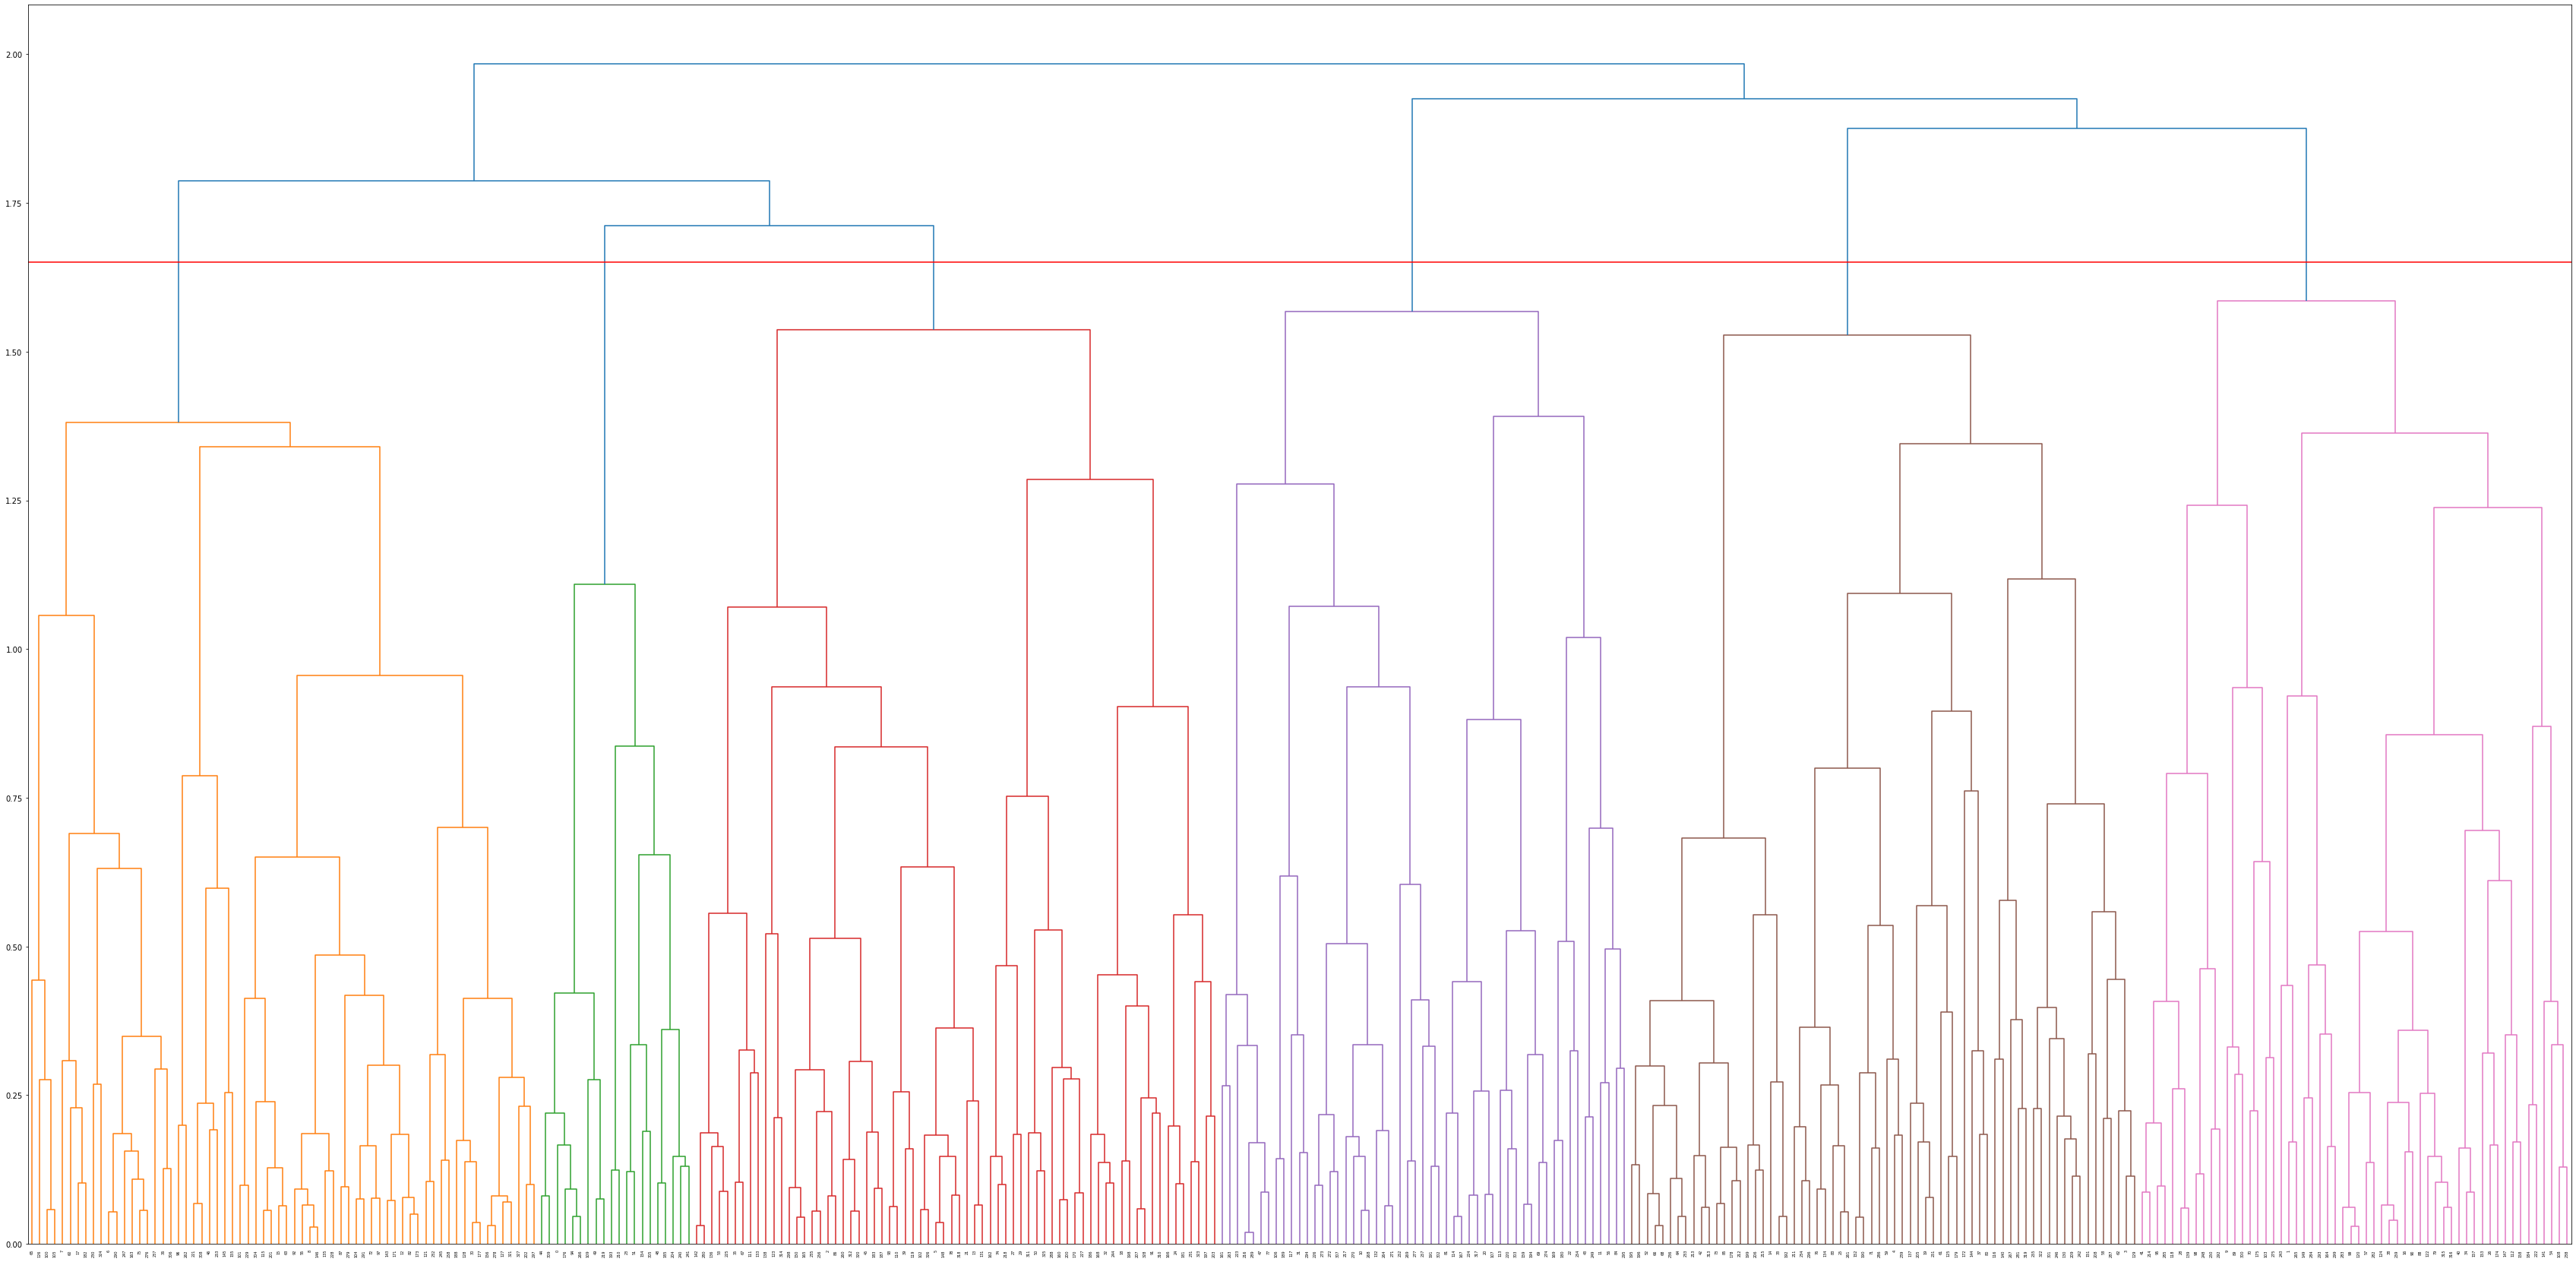

In [17]:
Z_comp_cos = linkage(data_for_clust, method='complete', metric='cosine')

plt.figure(figsize=(60, 30))
dendrogram(Z_comp_cos, color_threshold=1.65)
plt.axhline(y=1.65, c='r')
plt.show()

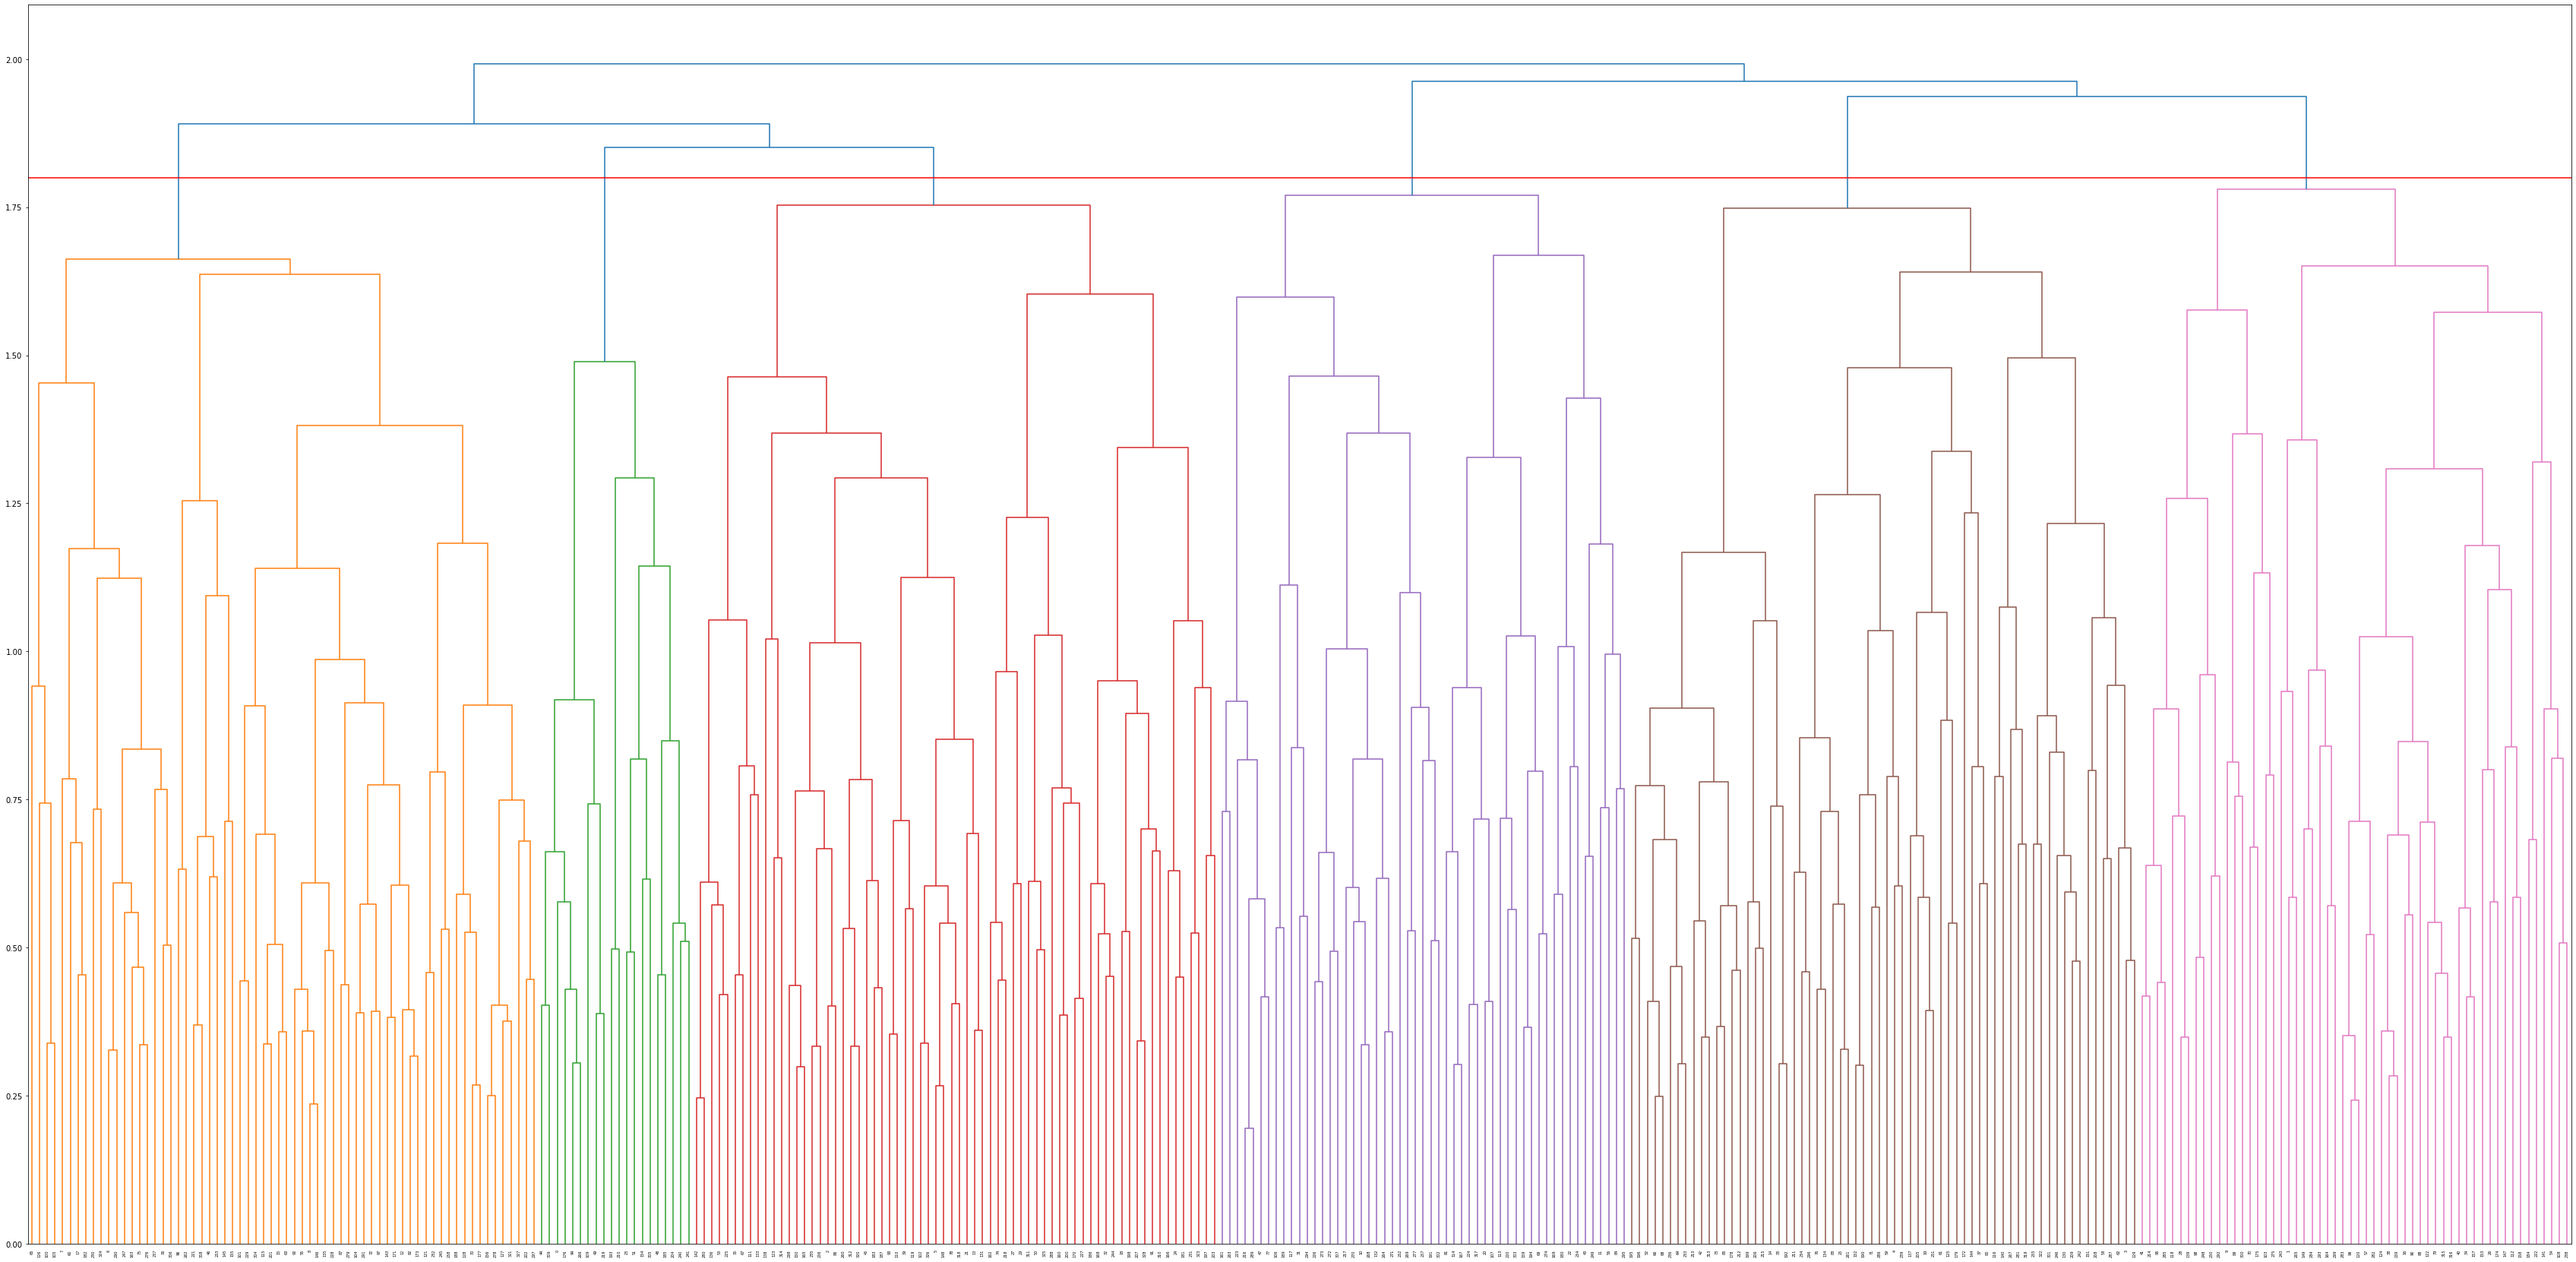

In [18]:
Z_comp_euc = linkage(data_for_clust, method='complete', metric='euclidean')

plt.figure(figsize=(60, 30))
dendrogram(Z_comp_euc, color_threshold=1.8)
plt.axhline(y=1.8, c='r')
plt.show()

Видно, что в случае метода дальнего соседа результаты для косинусной и евклидовой метрики одинаковы.

In [19]:
data['cl_comp_cos'] = fcluster(Z_comp_cos , t=6, criterion='maxclust')
pd.concat([df.loc[data['cl_comp_cos'] == i].mean() for i in range(1,7)],  axis=1)

,0,1,2,3,4,5
Climate,571.560606,490.00,507.044118,615.547170,5.629697e+02,454.660714
HousingCost,7243.409091,8421.60,6811.279412,11318.264151,9.080076e+03,7807.160714
HlthCare,785.257576,573.80,612.485294,1277.509434,2.476576e+03,964.178571
Crime,700.439394,909.35,994.558824,1132.735849,1.180864e+03,824.446429
Transp,3616.484848,3331.50,2804.044118,4490.094340,5.494424e+03,5152.089286
Educ,2780.378788,2896.10,2683.176471,2666.245283,3.163288e+03,2716.553571
Arts,1267.818182,1017.55,1044.735294,3875.754717,8.086500e+03,2186.571429
Recreat,1415.393939,1285.35,1471.955882,2639.490566,2.084576e+03,1975.517857
Econ,4581.530303,7290.60,5400.970588,6415.018868,5.739485e+03,5064.000000
Pop,239740.439394,158215.20,180707.014706,562831.150943,1.454717e+06,261792.357143


Есть ощущение что группы 3 и 4 здесь будут в сумме давать группу 0 в методе Варда. Проверим это и другие групп ниже.

In [20]:
print(data[(data['cl_ward'] == 1)].shape[0]) # количество элементов в группе 0 в варде
print(data[(data['cl_comp_cos'] == 4)].shape[0]) # количество элементов в группе 3 в complete
print(data[(data['cl_comp_cos'] == 5)].shape[0]) # количество элементов в группе 4 в complete

84
53
66


In [21]:
print(data[(data['cl_ward'] == 1) & (data['cl_comp_cos'] == 4)].shape[0])
print(data[(data['cl_ward'] == 1) & (data['cl_comp_cos'] == 5)].shape[0])


28
51


Видно, что группы 3 и 4 в complete являются подмножеством группы 0 в варде, при чем групп из групп 4 берется больше элементов.

In [22]:
print(data[(data['cl_ward'] == 2)].shape[0]) # количество элементов в группе 1 в варде

121


In [23]:
print(data[(data['cl_ward'] == 2) & (data['cl_comp_cos'] == 1)].shape[0])
print(data[(data['cl_ward'] == 2) & (data['cl_comp_cos'] == 3)].shape[0])


61
44


Группы 0 и 2 являются подмножестваи группы 1 в методе варда, при чем группа 0 составляют половину.

In [24]:
print(data[(data['cl_ward'] == 3)].shape[0]) # количество элементов в группе 2 в варде

37


In [25]:
print(data[(data['cl_ward'] == 3) & (data['cl_comp_cos'] == 6)].shape[0])

33


Видно, что группа 5 является подмножеством группы 2 в методе Варда, к тому же почти полностью совпадают.

In [26]:
print(data[(data['cl_ward'] == 4)].shape[0]) # количество элементов в группе 3 в варде

87


In [27]:
print(data[(data['cl_ward'] == 4) & (data['cl_comp_cos'] == 1)].shape[0])
print(data[(data['cl_ward'] == 4) & (data['cl_comp_cos'] == 2)].shape[0])
print(data[(data['cl_ward'] == 4) & (data['cl_comp_cos'] == 3)].shape[0])
print(data[(data['cl_ward'] == 4) & (data['cl_comp_cos'] == 4)].shape[0])
print(data[(data['cl_ward'] == 4) & (data['cl_comp_cos'] == 5)].shape[0])
print(data[(data['cl_ward'] == 4) & (data['cl_comp_cos'] == 6)].shape[0])

4
17
24
22
11
9


Все группы имеют непустое пересечение с группой 3 в методе Варда, поэтому, считаю, можно уменьшить число кластеров до 5.

In [28]:
data['cl_comp_cos'] = fcluster(Z_comp_cos , t=5, criterion='maxclust')

In [29]:
pd.concat([df.loc[data['cl_comp_cos'] == i].mean() for i in range(1,6)],  axis=1)

,0,1,2,3,4
Climate,571.560606,503.170455,615.547170,5.629697e+02,454.660714
HousingCost,7243.409091,7177.261364,11318.264151,9.080076e+03,7807.160714
HlthCare,785.257576,603.693182,1277.509434,2.476576e+03,964.178571
Crime,700.439394,975.193182,1132.735849,1.180864e+03,824.446429
Transp,3616.484848,2923.920455,4490.094340,5.494424e+03,5152.089286
Educ,2780.378788,2731.568182,2666.245283,3.163288e+03,2716.553571
Arts,1267.818182,1038.556818,3875.754717,8.086500e+03,2186.571429
Recreat,1415.393939,1429.545455,2639.490566,2.084576e+03,1975.517857
Econ,4581.530303,5830.431818,6415.018868,5.739485e+03,5064.000000
Pop,239740.439394,175595.238636,562831.150943,1.454717e+06,261792.357143


Теперь, схожесть с таблицей в методе Варда более очевидна. Ниже показно, что группа 1 и 2 сильно персекаются с группой 3 из метода Варда (хотя показатель климата у них довольно сильна различается). Возможно, это связано с тем, что группа 3 из варда разбилась на несколько групп, которые в свою очередь притянули другие, которые и "попортили" показатель климата. Так же, группа 2 и 3 входят в группу 0(варда).

In [30]:
print(data[(data['cl_ward'] == 4) & (data['cl_comp_cos'] == 2)].shape[0])
print(data[(data['cl_ward'] == 4) & (data['cl_comp_cos'] == 3)].shape[0])
print(data[(data['cl_ward'] == 4)].shape[0]) # количество городов в 3 группе метода Варда

41
22
87


In [31]:
print(data[(data['cl_ward'] == 1) & (data['cl_comp_cos'] == 4)].shape[0])
print(data[(data['cl_ward'] == 1) & (data['cl_comp_cos'] == 3)].shape[0])
print(data[(data['cl_ward'] == 1)].shape[0])

51
28
84


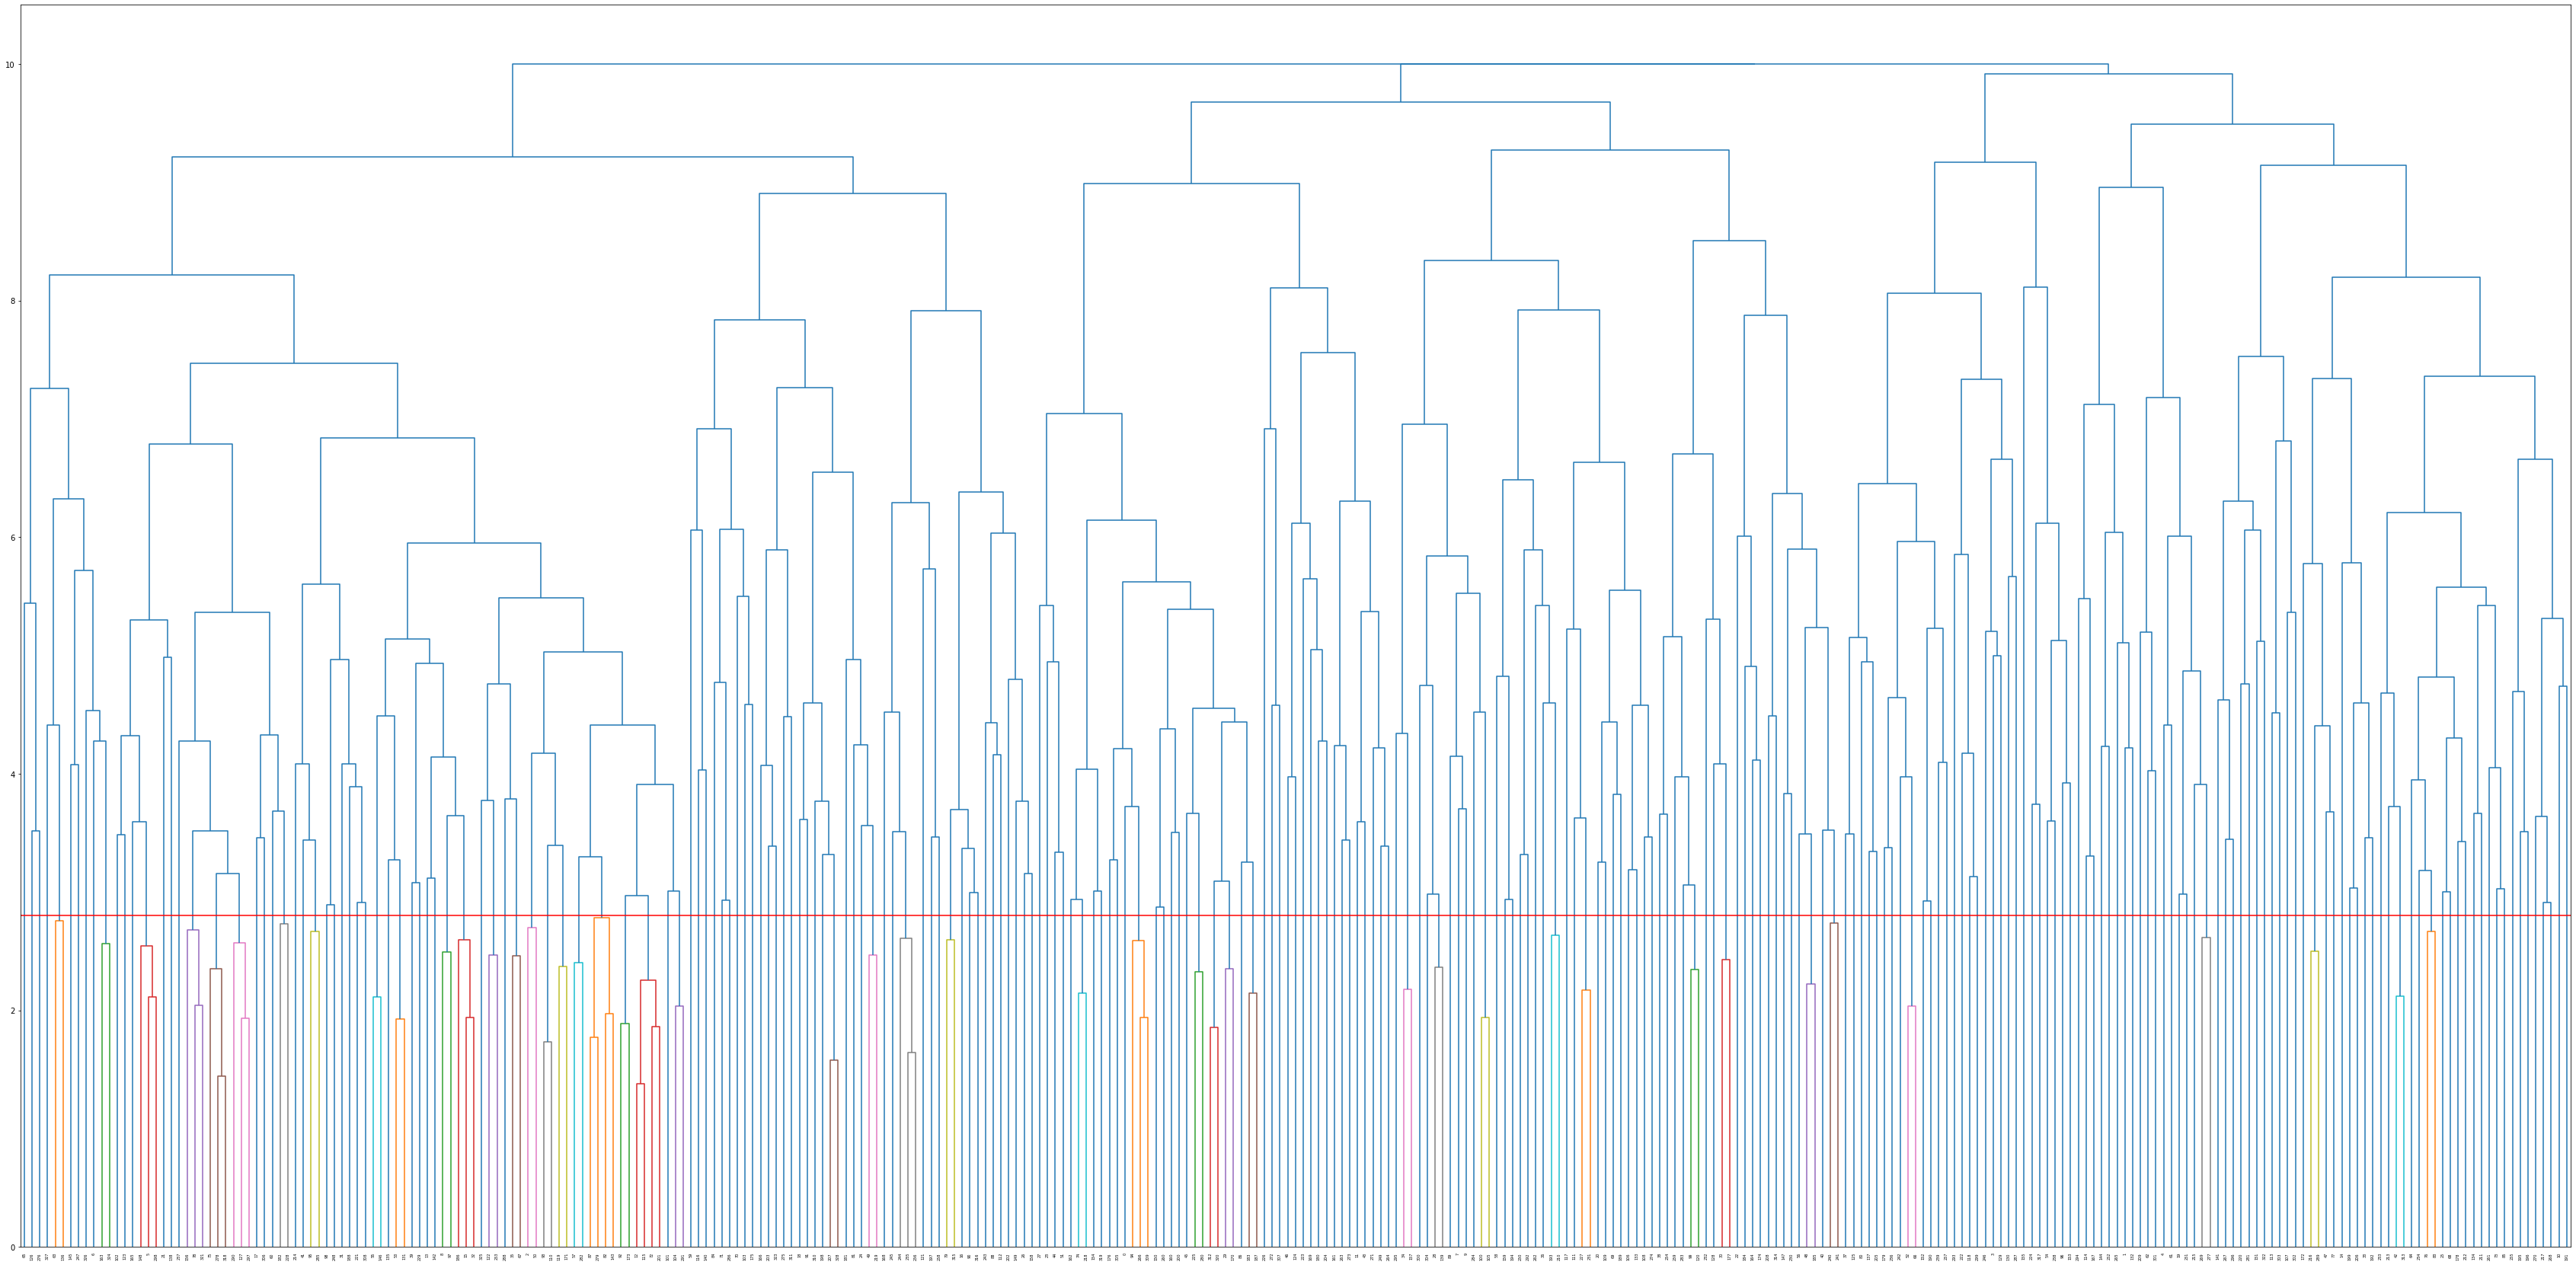

In [32]:
Z_comp_canb = linkage(data_for_clust, method='complete', metric='canberra')

plt.figure(figsize=(60, 30))
dendrogram(Z_comp_canb, color_threshold=2.8)
plt.axhline(y=2.8, c='r')
plt.show()

Считаю, что с метрикой Канберра довольно сложно произвести разбиение, поэтому пропустим ее и перейдем к следующему разбиению.

**Метод Average**

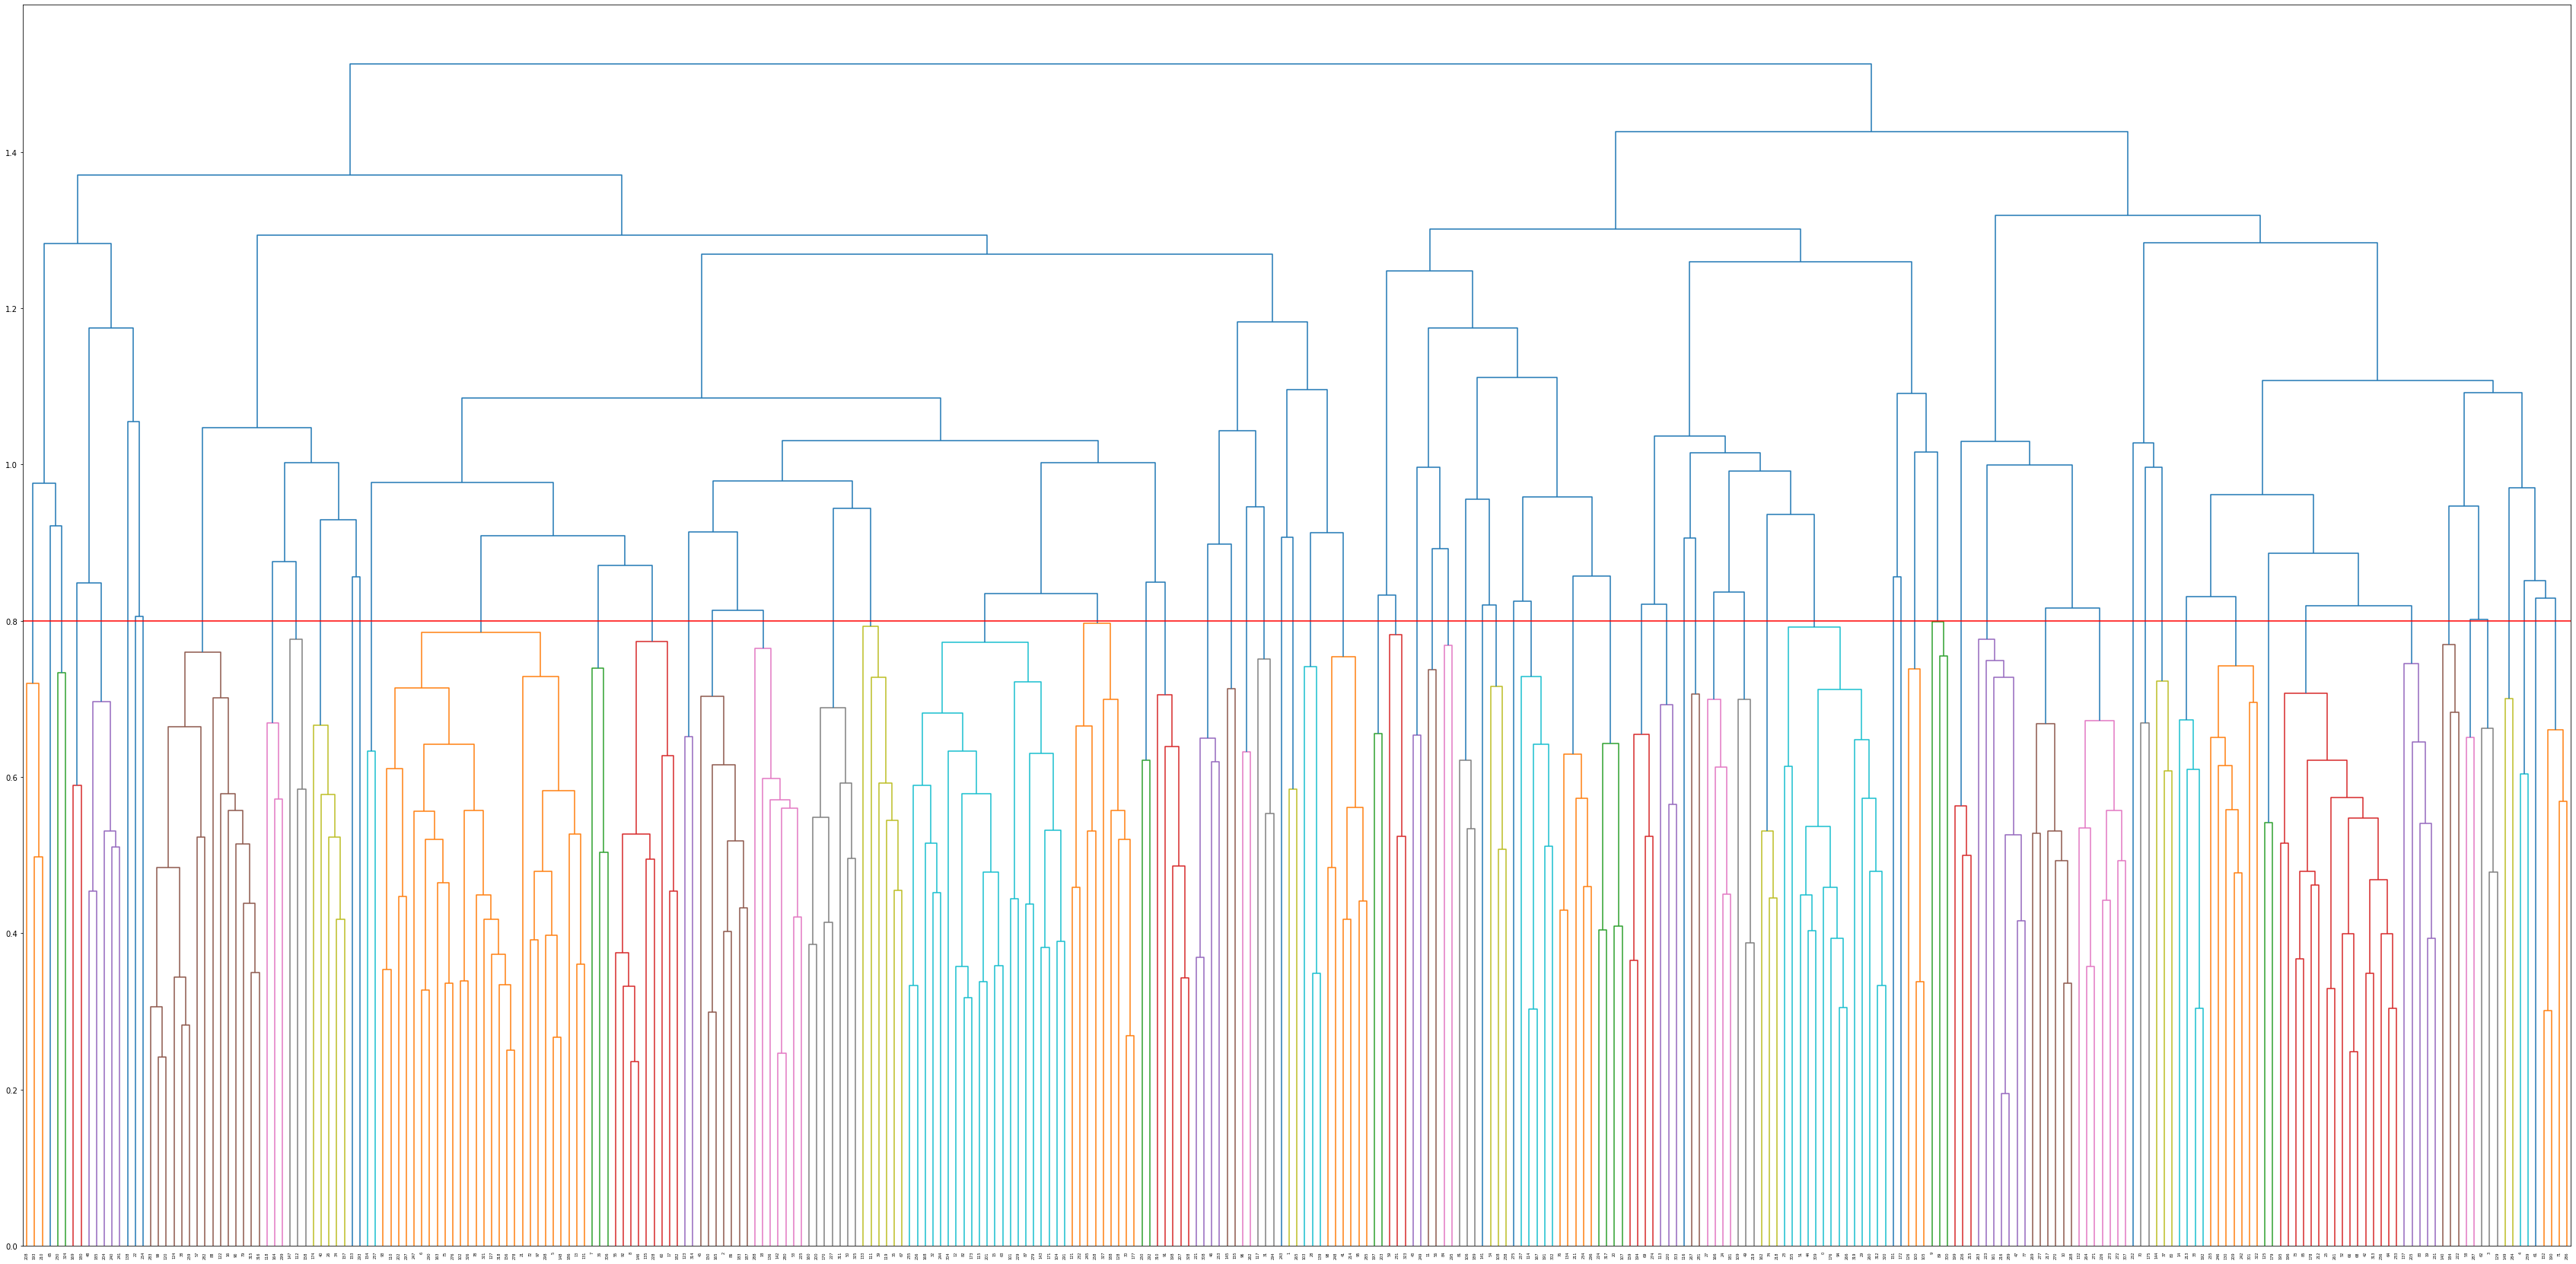

In [33]:
Z_aver_euc = linkage(data_for_clust, method='average', metric='euclidean')

plt.figure(figsize=(60, 30))
dendrogram(Z_aver_euc, color_threshold=0.8)
plt.axhline(y=0.8, c='r')
plt.show()

Какой ад происходит, нормальную класстеризацию не выявить. Пропустим евклидову метрику.

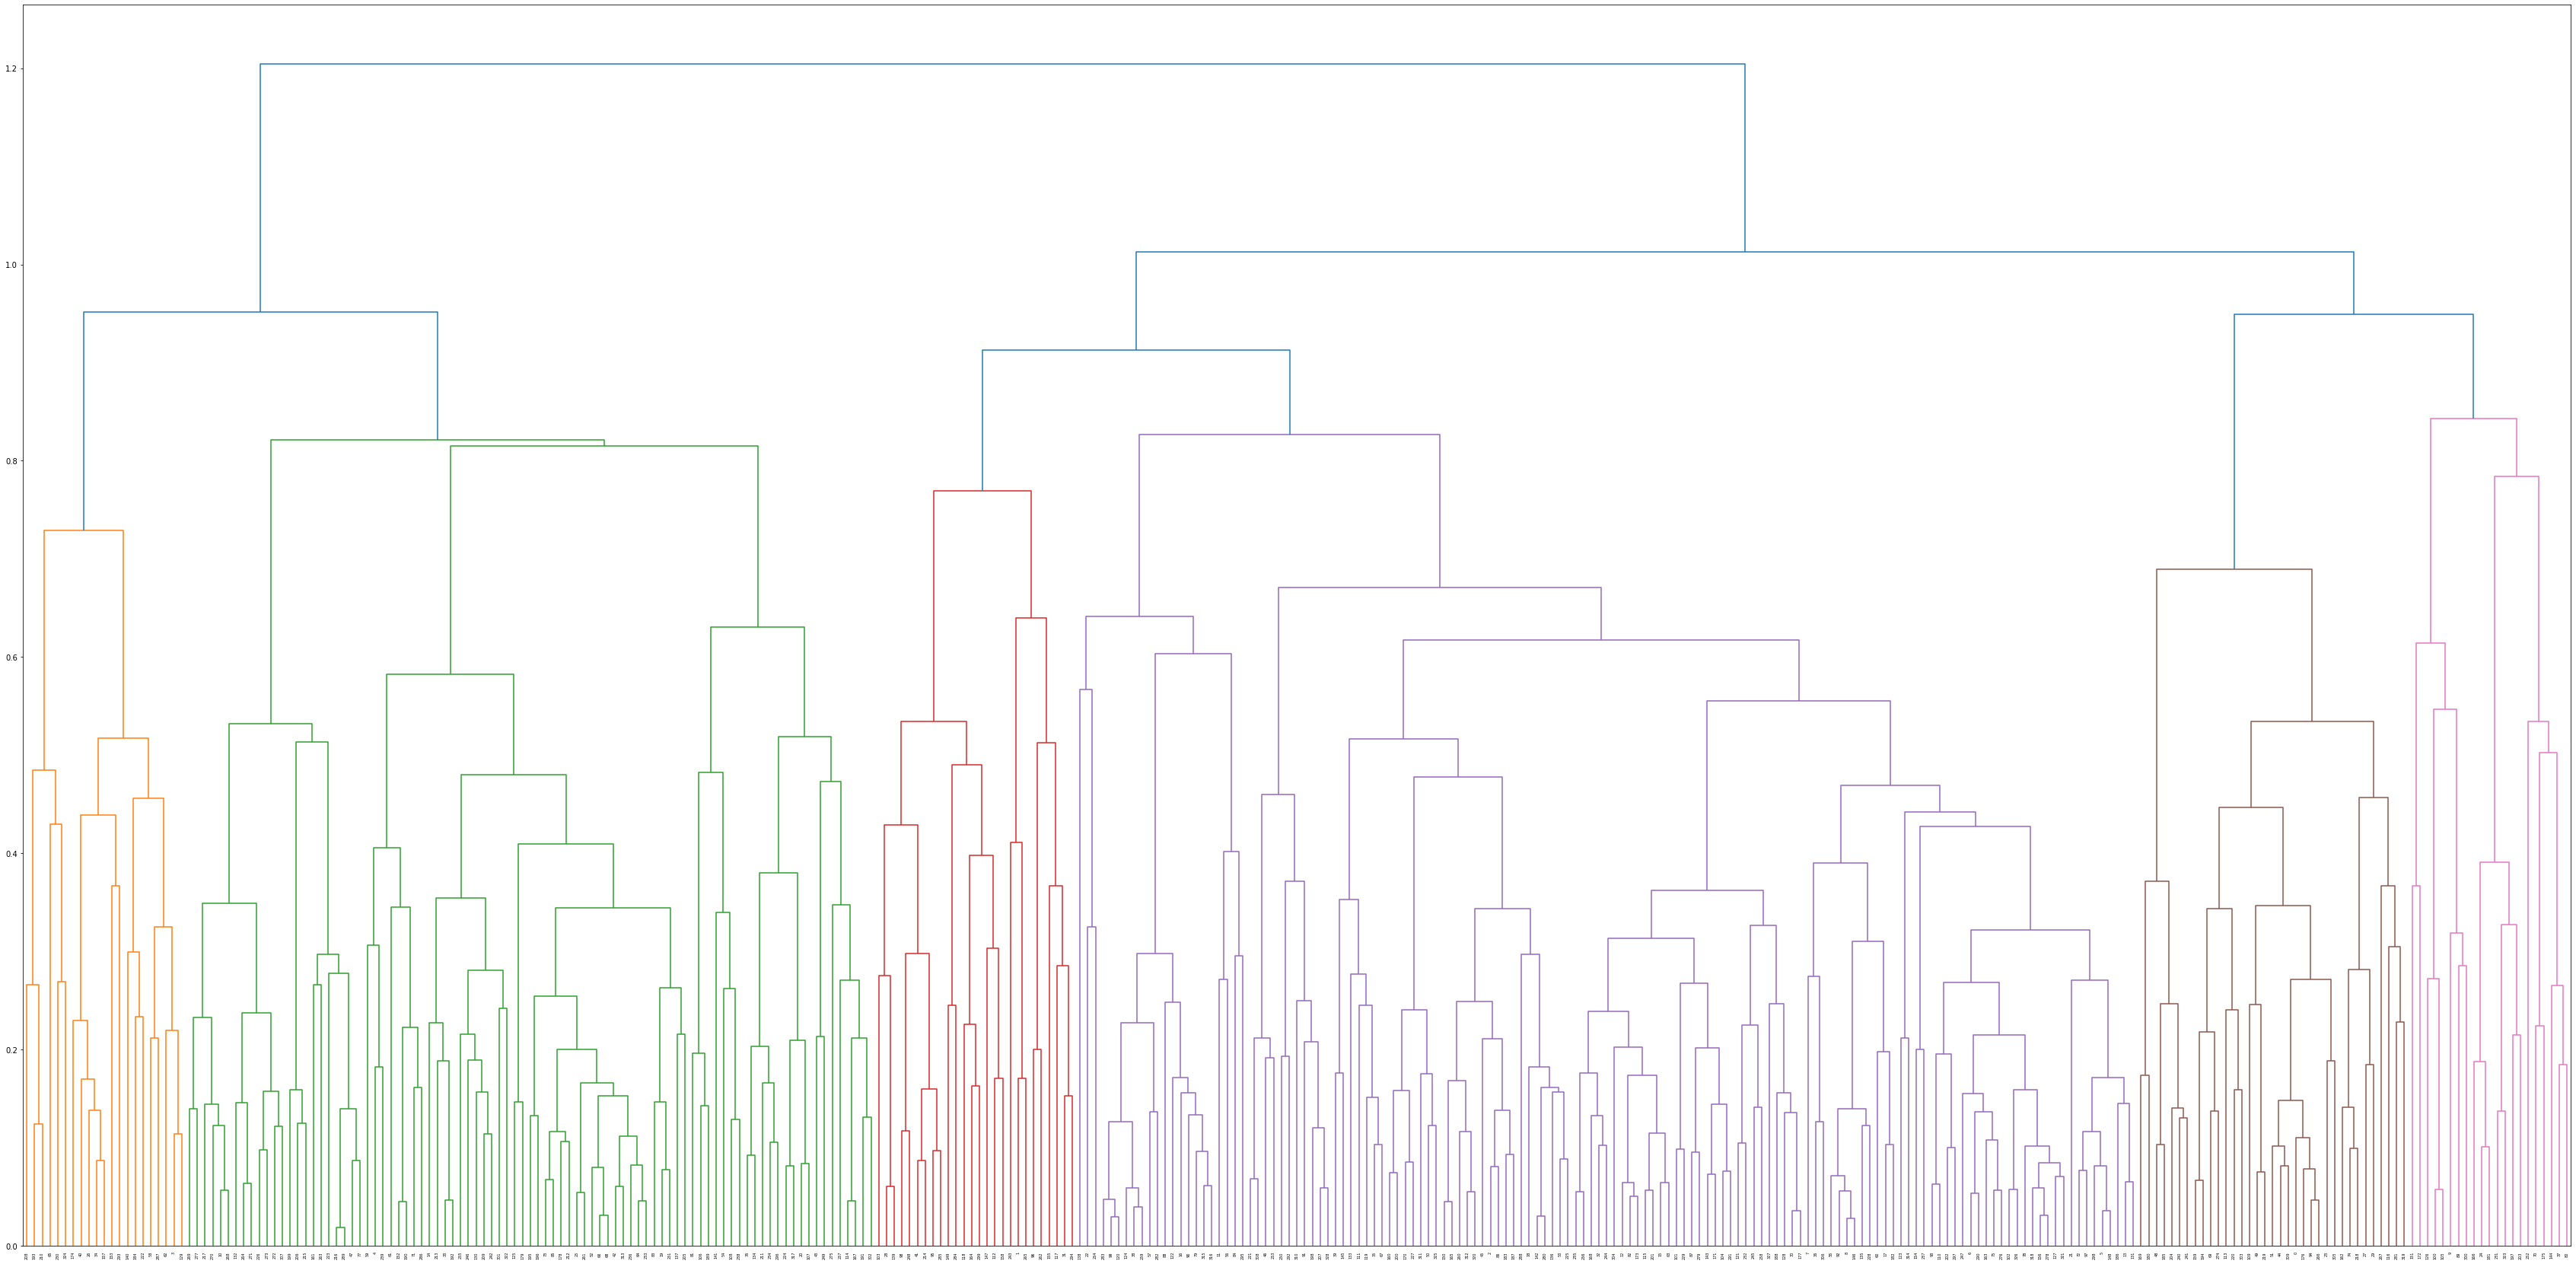

In [34]:
Z_aver_cos = linkage(data_for_clust, method='average', metric='cosine')

plt.figure(figsize=(60, 30))
dendrogram(Z_aver_cos)
plt.show()

Выделилось 6 классов.

In [35]:
data['cl_aver_сos'] = fcluster(Z_aver_cos , t=6, criterion='maxclust')
pd.concat([df.loc[data['cl_aver_сos'] == i].mean() for i in range(1,7)],  axis=1)

,0,1,2,3,4,5
Climate,499.285714,6.056742e+02,588.538462,504.788321,472.800000,564.142857
HousingCost,8686.047619,1.059683e+04,7874.269231,7174.233577,8020.485714,7246.428571
HlthCare,1155.190476,2.167247e+03,866.576923,717.642336,739.400000,1249.380952
Crime,802.809524,1.185764e+03,913.192308,765.656934,1085.085714,1294.238095
Transp,5567.380952,5.208472e+03,5107.923077,3332.051095,3617.571429,4225.523810
Educ,3132.190476,3.000618e+03,2700.461538,2679.854015,2787.371429,2778.904762
Arts,2536.619048,7.220303e+03,2522.269231,1139.248175,1859.428571,2572.809524
Recreat,1771.047619,2.587472e+03,2239.615385,1424.583942,1560.371429,1515.809524
Econ,5552.666667,5.978022e+03,4440.692308,5021.927007,7250.742857,5331.285714
Pop,292807.000000,1.258230e+06,333490.923077,191667.802920,288657.542857,410157.761905


In [36]:
print(data[(data['cl_aver_сos'] == 2) & (data['cl_ward'] == 1)].shape[0])
print(data[(data['cl_aver_сos'] == 4) & (data['cl_ward'] == 2)].shape[0])
print(data[(data['cl_aver_сos'] == 5) & (data['cl_ward'] == 4)].shape[0])


78
103
35


Группа 1 является почти полностью состоит из элементов группы 0 из метода Варда (это, в принципе видно и по цифрам). Группа 3 эквивалетна группе 1 (Варда), группа 4 полностью лежит в группе 3 (Варда)

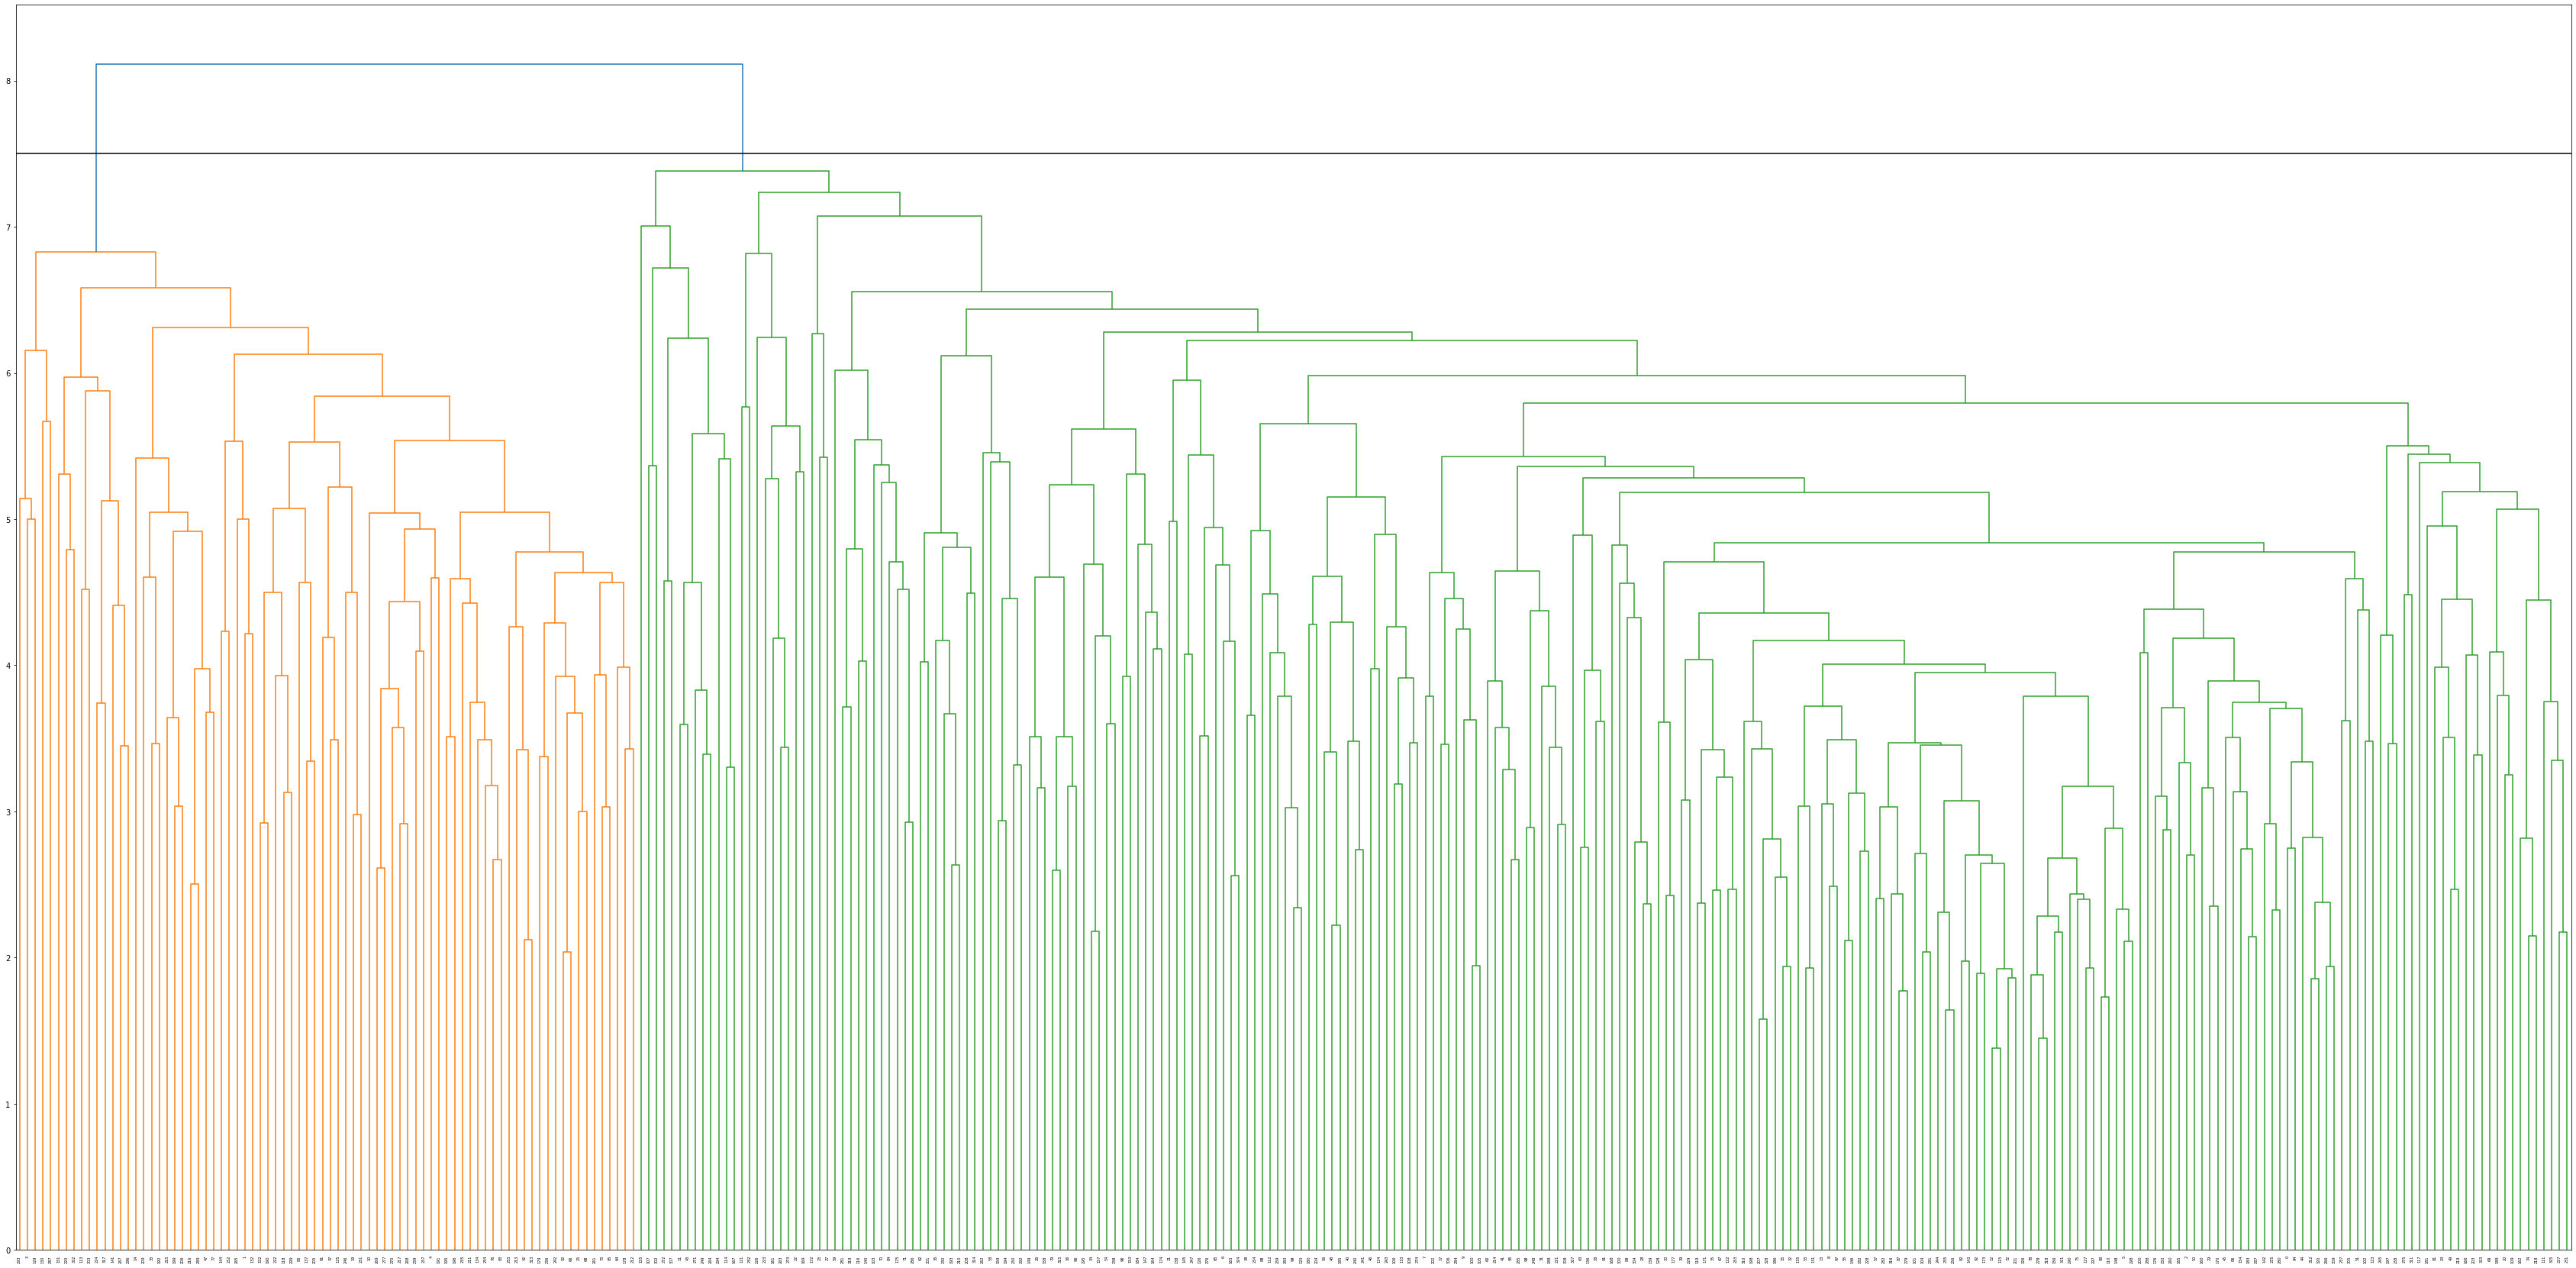

In [37]:
Z_aver_can = linkage(data_for_clust, method='average', metric='canberra')

plt.figure(figsize=(60, 30))
dendrogram(Z_aver_can, color_threshold=7.5)
plt.axhline(y=7.5, c='k')
plt.show()

С метрикой Канберра можно выделить 2 кластера.

In [38]:
data['cl_aver_сan'] = fcluster(Z_aver_can, t=2, criterion='maxclust')
pd.concat([df.loc[data['cl_aver_сan'] == i].mean() for i in range(1,3)],  axis=1)

,0,1
Climate,5.906500e+02,522.052209
HousingCost,1.002485e+04,7807.349398
HlthCare,2.440175e+03,782.706827
Crime,1.177625e+03,891.473896
Transp,5.434188e+03,3816.795181
Educ,3.067088e+03,2733.859438
Arts,8.195312e+03,1530.184739
Recreat,2.370762e+03,1677.345382
Econ,5.819275e+03,5430.935743
Pop,1.464159e+06,219454.734940


In [39]:
data[data['cl_aver_сan'] == 1].shape[0]

80

In [40]:
print(data[(data['cl_aver_сan'] == 1) & (data['cl_ward'] == 1)].shape[0])


62


Видно, что класс 0 здесь это класс 0 в методе Варда(большее его часть). Соотвественно, 1 класс это все остальные группы в методе Варда.

**Single, Centorid, Median**

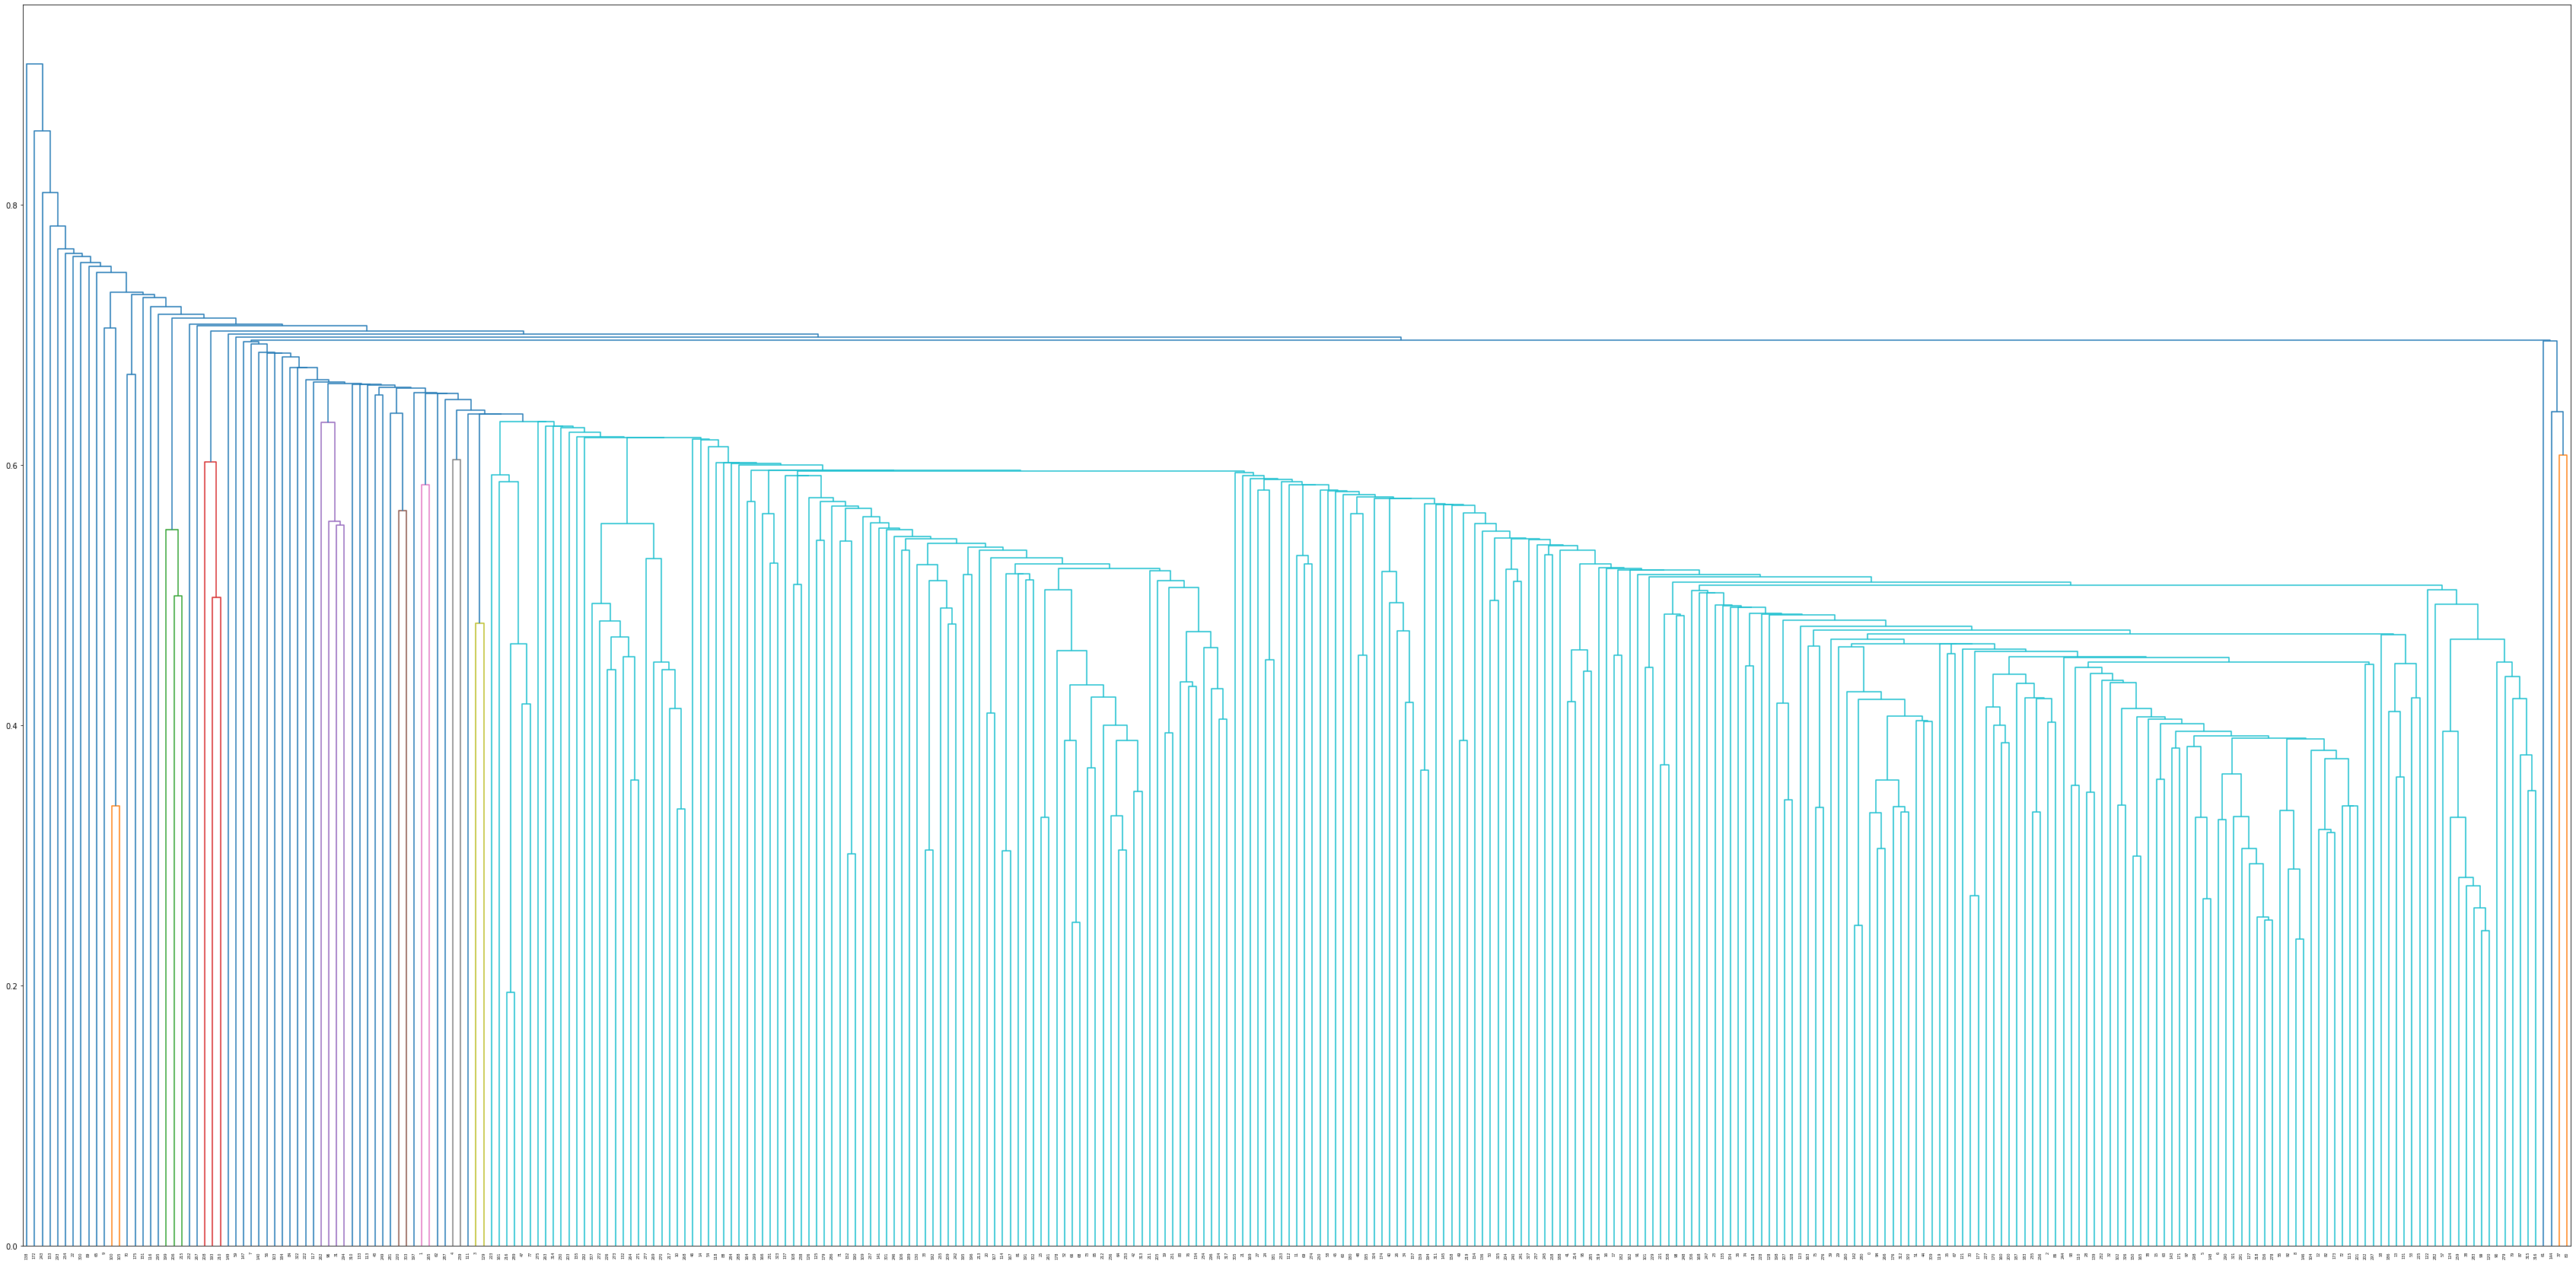

In [41]:
Z_sin = linkage(data_for_clust, method='single')

plt.figure(figsize=(60, 30))
dendrogram(Z_sin)
plt.show()

Даже не знаю, есть ли смысл говорить, что тут бессмысленно что-то кластеризовать при любой метрики, нечитаемая штука.

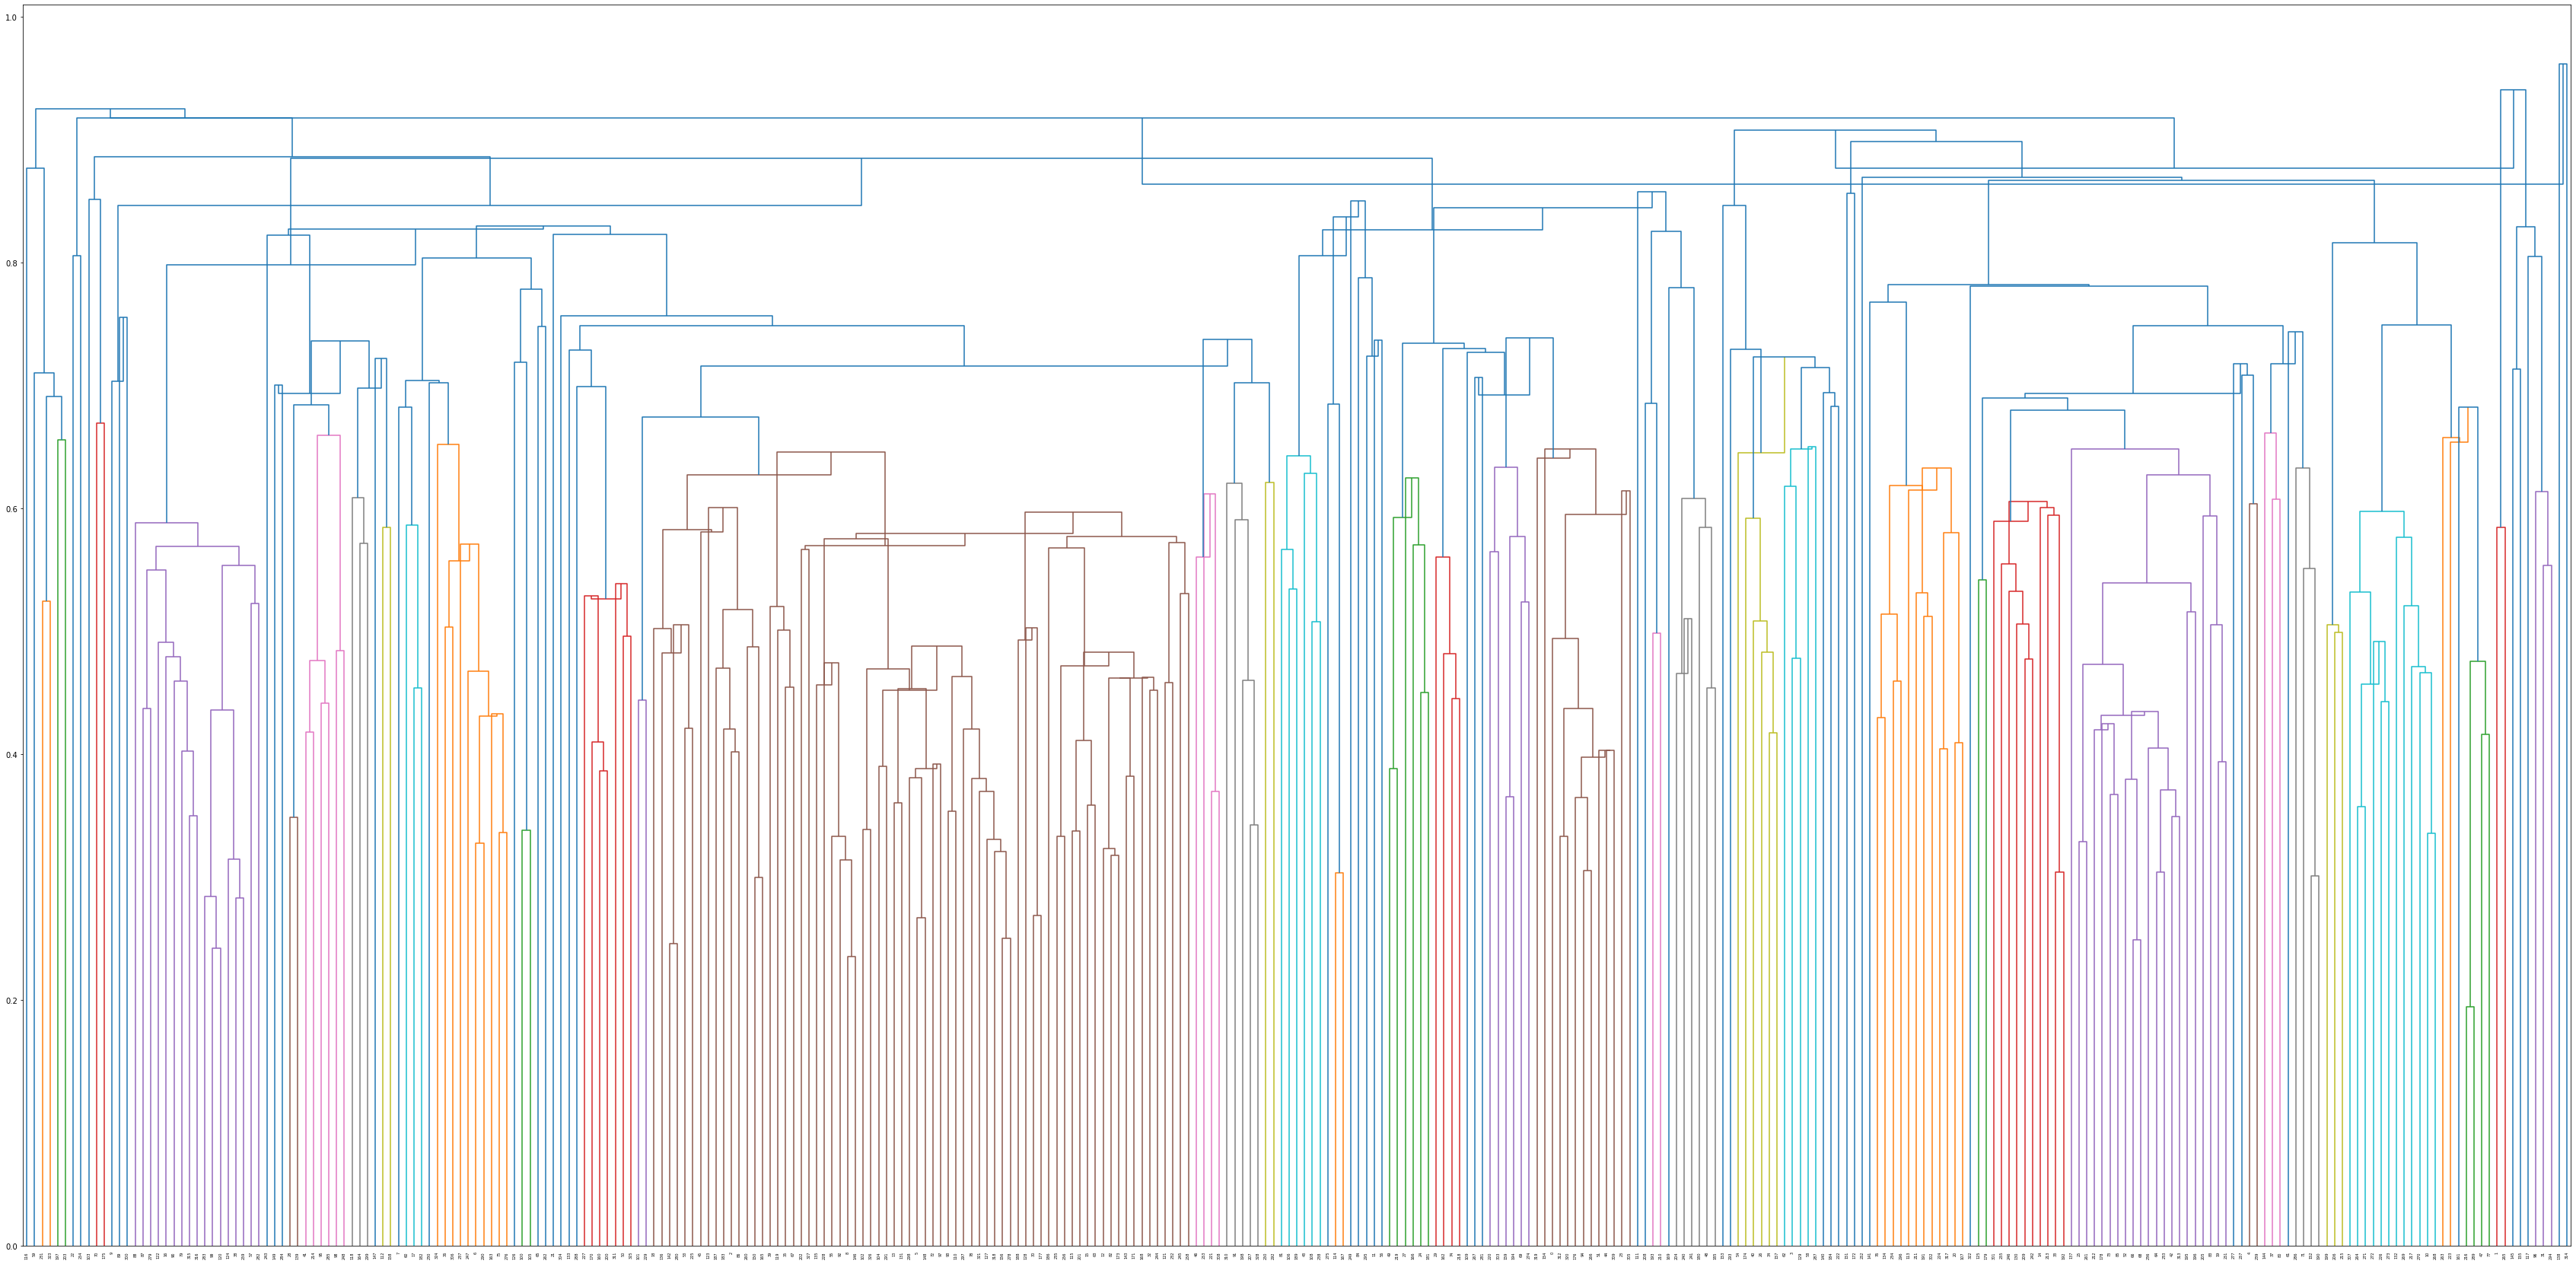

In [42]:
Z_cen = linkage(data_for_clust, method='centroid')

plt.figure(figsize=(60, 30))
dendrogram(Z_cen)
plt.show()

Аналогичная ситуация как и с single, невозможно что-то нормально поделить на группы.

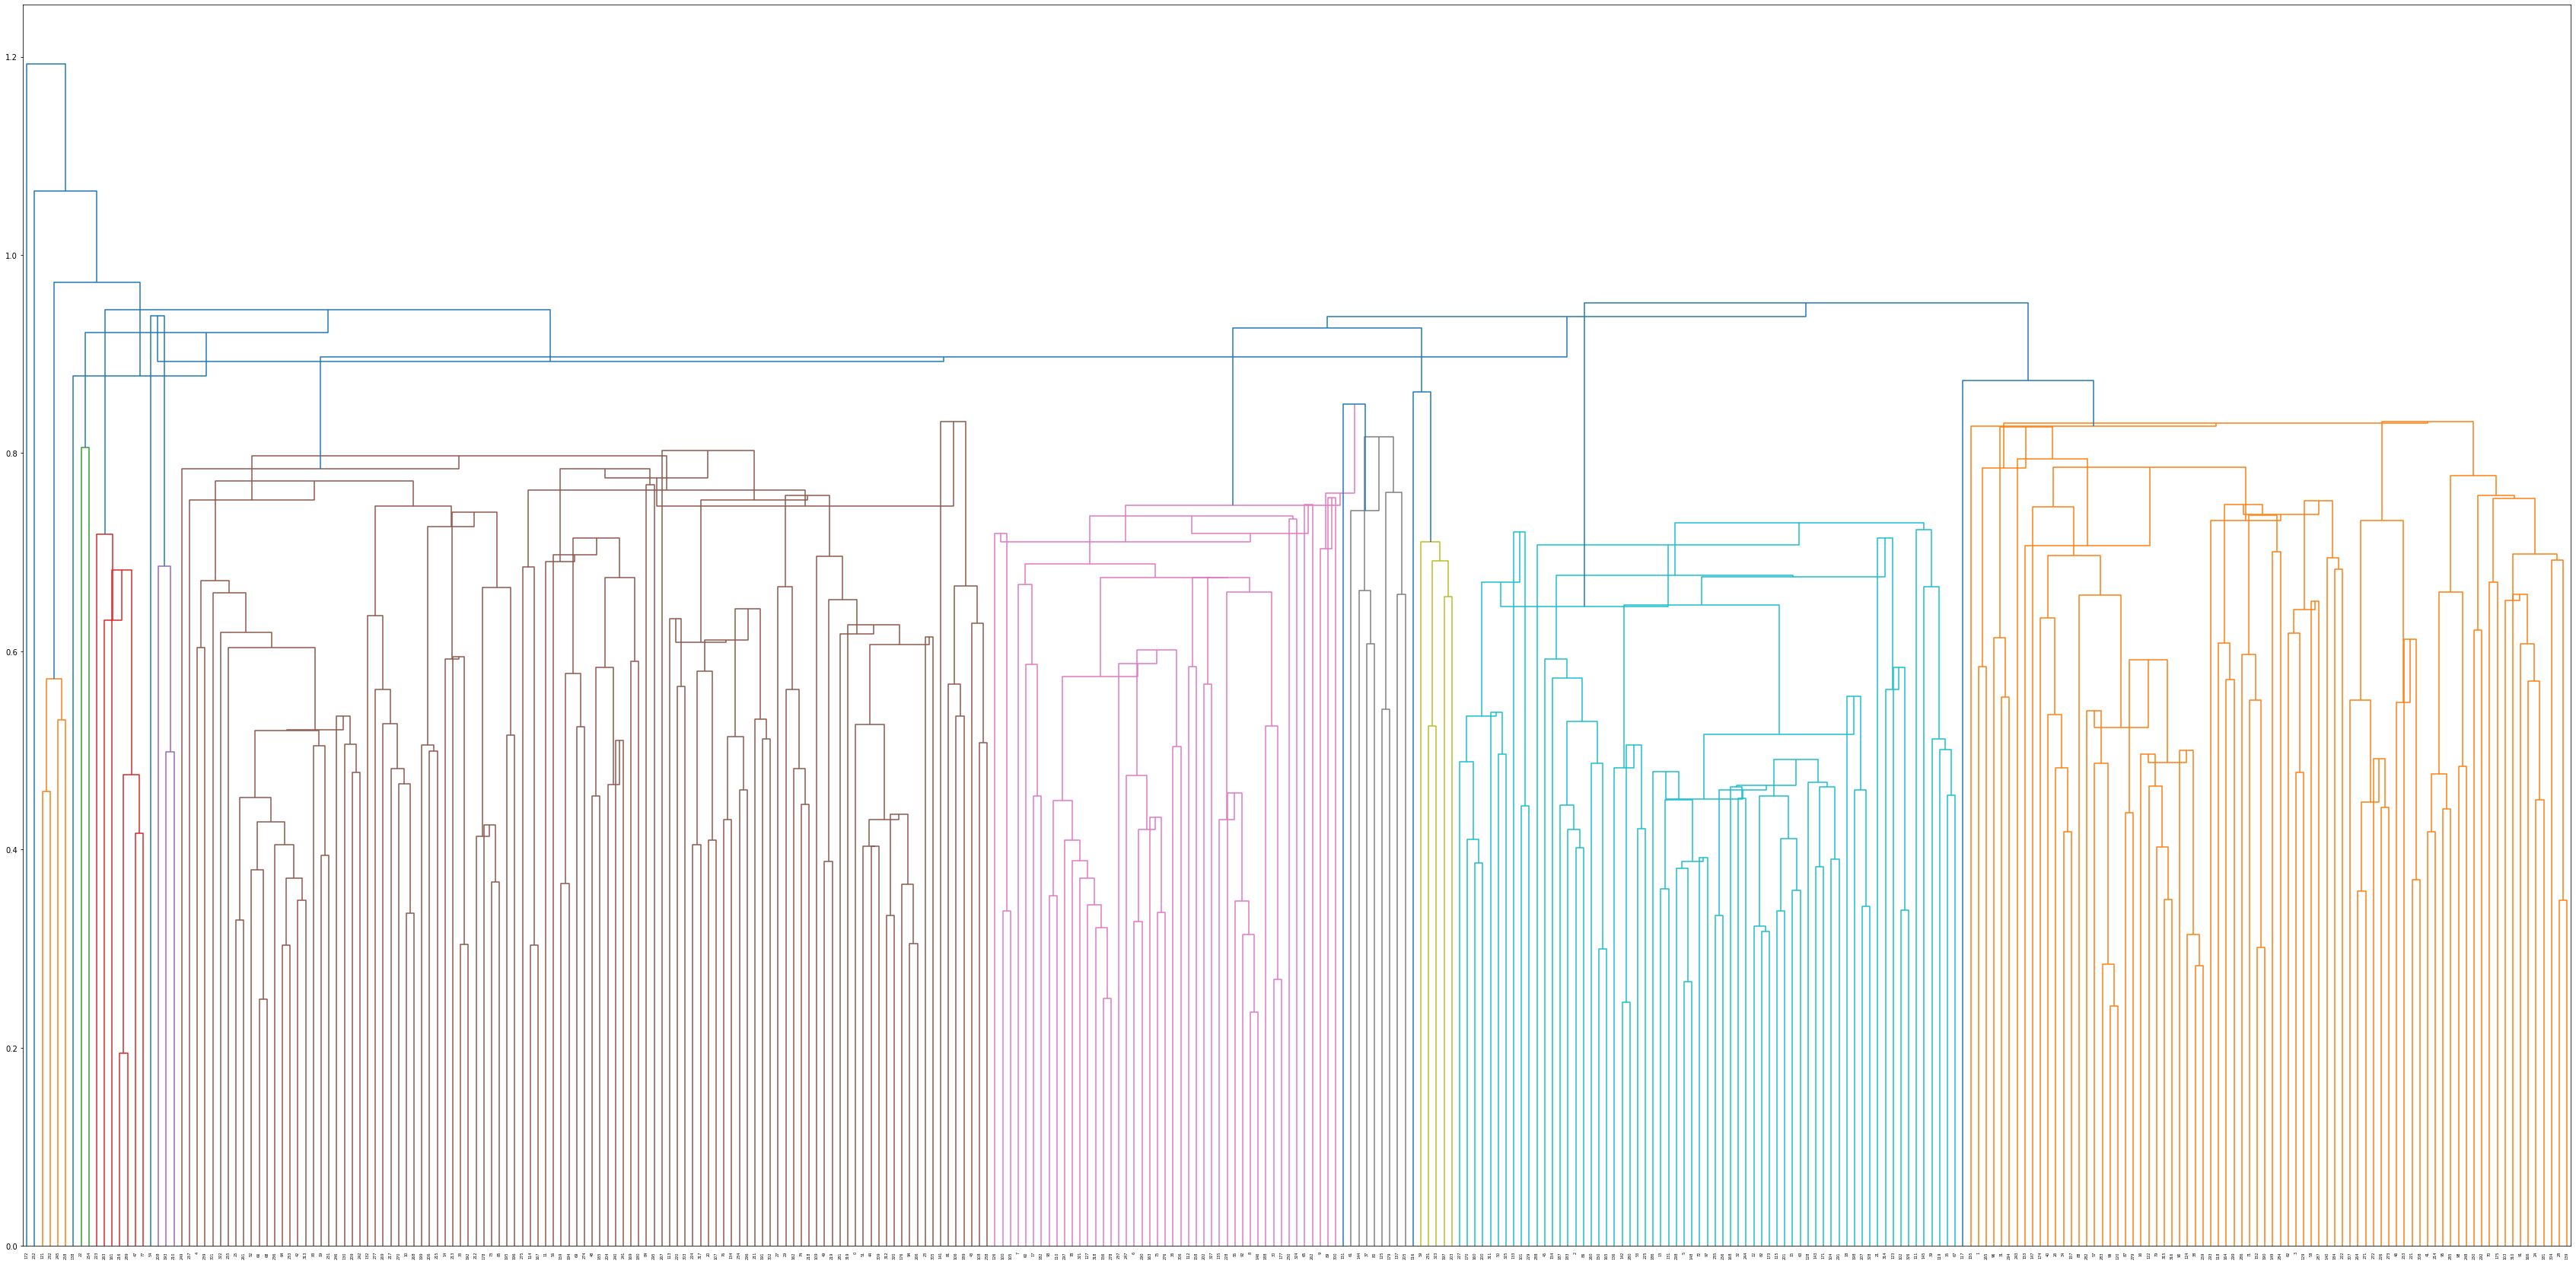

In [43]:
Z_med = linkage(data_for_clust, method='median')

plt.figure(figsize=(60, 30))
dendrogram(Z_med)
plt.show()

***Вывод:*** для меода single, median и centorid невозможно что-то кластеризовать, так как дендрограммы не читаемы.

# Задание 3

Выполните кластеризацию методом Dbscan. Используйте расстояния между объектами, определенные в предыдущем пункте.
Реализуйте эвристику (см. лекции) для выбора параметров алгоритма. Подберите подходящие параметры алгоритма.

Реализуем эвристику.

In [75]:
def make_dist_matr(data, metrica): #функция, которая возвращает двойной массив, с расстояниеями между точками
    dist_list = pdist(data, metrica)
    matr = [[0 for j in range(data.shape[0])] for i in range(data.shape[0])]
    k = 0
    for i in range(data.shape[0]):
        for j in range(i+1, data.shape[0]):
                matr[i][j] = matr[j][i] = dist_list[k]
                k+=1
    return np.array(matr)

**Cosine**

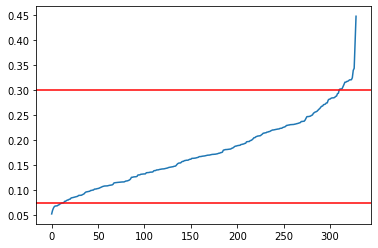

In [76]:
dist_matr_cos = make_dist_matr(data_for_clust, 'cosine')

k = 5
f_list = []
for i in range(len(data)):
    list_tmp = dist_matr_cos[:][i].tolist()
    list_tmp.sort()
    list_tmp = list_tmp[1:k + 1]
    f_list.append(sum(list_tmp) / k)
f_list.sort()

plt.plot(f_list)
plt.axhline(y=0.3, c='r')
plt.axhline(y=0.075, c='r')
plt.show()

Будем брать эпсилон там, где график круче всего меняется, то есть в красном промежутке.

In [77]:
cl_dbscan = DBSCAN(eps=0.20, min_samples=5, metric='cosine')
Z_dbscan = cl_dbscan.fit(data_for_clust)


In [78]:
data['cl_dbscan_cos'] = [str(i) for i in Z_dbscan.labels_]

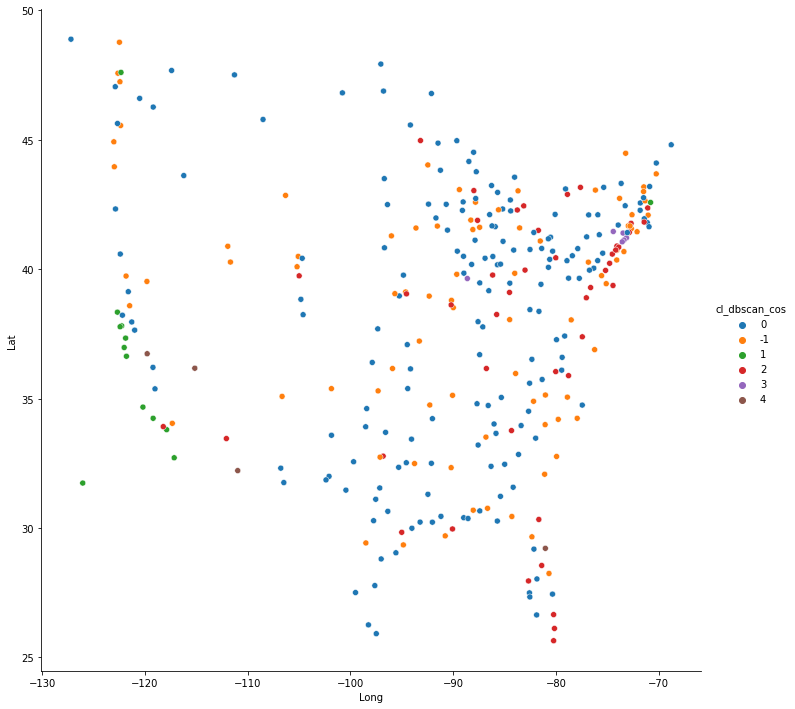

In [79]:
sns.pairplot(x_vars="Long", 
             y_vars="Lat", 
             data=data,
             hue='cl_dbscan_cos',
             height=10)
plt.show()

In [80]:
pd.Series(cl_dbscan.labels_).value_counts()

 0    176
-1     85
 2     45
 1     13
 3      6
 4      4
dtype: int64

**Euclidean**

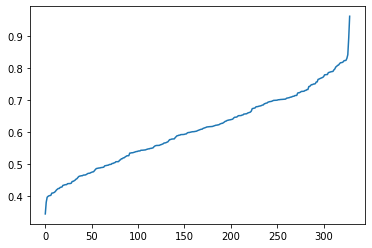

In [81]:
dist_matr_euc = make_dist_matr(data_for_clust, 'euclidean')

k = 7
f_list = []
for i in range(len(data)):
    list_tmp = dist_matr_euc[:][i].tolist()
    list_tmp.sort()
    list_tmp = list_tmp[1:k + 1]
    f_list.append(sum(list_tmp) / k)
f_list.sort()

plt.plot(f_list)
plt.show()

In [82]:
cl_dbscan = DBSCAN(eps=0.58, min_samples=7, metric='euclidean')
Z_dbscan = cl_dbscan.fit(data_for_clust)


In [83]:
data['cl_dbscan_euc'] = [str(i) for i in Z_dbscan.labels_]

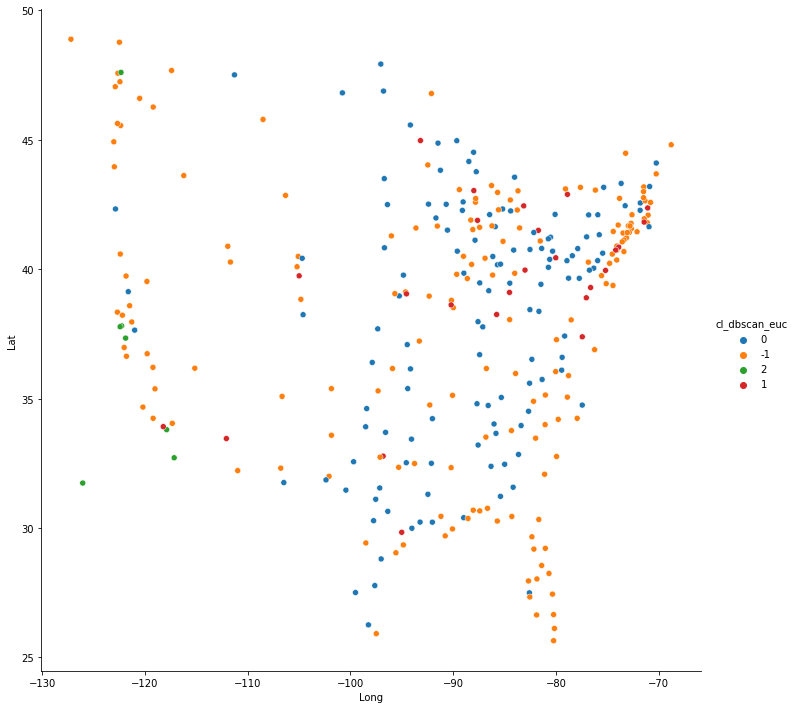

In [84]:
sns.pairplot(x_vars="Long", 
             y_vars="Lat", 
             data=data,
             hue='cl_dbscan_euc',
             height=10)
plt.show()

In [85]:
pd.Series(cl_dbscan.labels_).value_counts()

-1    169
 0    128
 1     25
 2      7
dtype: int64

**Canberra**

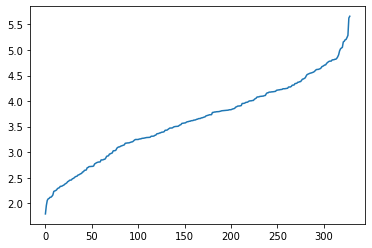

In [86]:
dist_matr_can = make_dist_matr(data_for_clust, 'canberra')

k = 6
f_list = []
for i in range(len(data)):
    list_tmp = dist_matr_can[:][i].tolist()
    list_tmp.sort()
    list_tmp = list_tmp[1:k + 1]
    f_list.append(sum(list_tmp) / k)
f_list.sort()

plt.plot(f_list)
plt.show()

In [87]:
cl_dbscan = DBSCAN(eps=3, min_samples=6, metric='canberra')
Z_dbscan = cl_dbscan.fit(data_for_clust)


In [88]:
data['cl_dbscan_can'] = [str(i) for i in Z_dbscan.labels_]

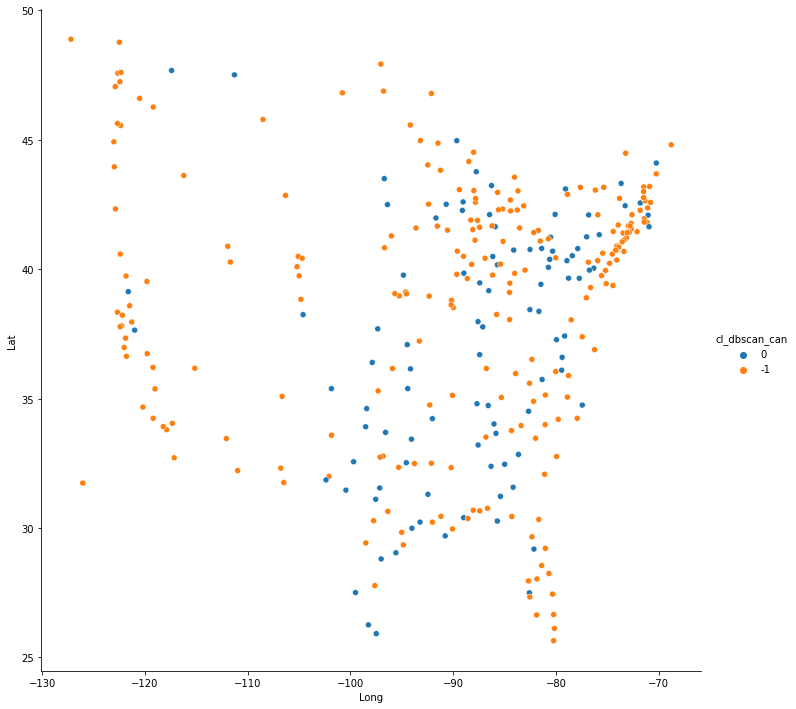

In [89]:
sns.pairplot(x_vars="Long", 
             y_vars="Lat", 
             data=data,
             hue='cl_dbscan_can',
             height=10)
plt.show()

In [90]:
pd.Series(cl_dbscan.labels_).value_counts()

-1    229
 0    100
dtype: int64

**Вывод:** с dbscan как-то не пошла кластеризация. Я перебрововал многие значения k и эпсилон и везде получалось довольно грустно, так как либо наблюдения попадали в выбросы, либо очень много в одной группе.

# Задание 4

Выполните кластеризацию методом kmeans. Определите наилучшее (на ваш взгляд) число кластеров.

Для выбора числа кластером применим локтевой метод

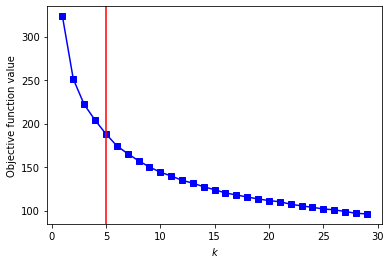

In [130]:
inertia = []
for i in range(1, 30):
    Z = KMeans(n_clusters=i, 
               init = 'random',
               n_init = 100,
               max_iter = 1000).fit(data_for_clust)
    inertia.append(Z.inertia_)

plt.plot(range(1, 30), inertia, 'bo-', marker='s')
plt.ylabel('Objective function value')
plt.xlabel('$k$')
plt.axvline(x=5, c='r')
plt.show()

Видимо, лучше всего брать разбиение по 5 кластеров.

In [131]:
Z_kmeans = KMeans(n_clusters = 5).fit(data_for_clust)

In [132]:
data['cl_kmeans_5'] = Z_kmeans.predict(data_for_clust)

In [133]:
pd.concat([df.loc[data['cl_kmeans_5'] == i].mean() for i in range(0,5)],  axis=1)

,0,1,2,3,4
Climate,656.911111,522.447619,473.890909,481.474576,5.900615e+02
HousingCost,11155.711111,6957.409524,7824.145455,7991.915254,9.409723e+03
HlthCare,1062.133333,706.304762,706.727273,1004.728814,2.615400e+03
Crime,936.933333,795.095238,1214.872727,730.152542,1.240662e+03
Transp,4229.266667,3057.114286,3747.636364,5234.067797,5.521123e+03
Educ,2590.222222,2674.361905,2768.490909,2934.864407,3.127785e+03
Arts,3374.222222,1075.161905,1778.381818,1947.559322,8.602954e+03
Recreat,2677.222222,1369.304762,1787.527273,1637.559322,2.279046e+03
Econ,5676.577778,4788.971429,6898.727273,5256.796610,5.691938e+03
Pop,414416.800000,187174.019048,292025.963636,251829.559322,1.577778e+06


Проверим схожесть данного разбиения с разбиением cl_comp_cos

In [134]:
for i in range(1, 6):
    for j in range(0, 5):
        m = data[(data['cl_comp_cos'] == i) & (data['cl_kmeans_5'] == j)].shape[0]
        if m > 5:
            print('cl_comp_cos:', i - 1, '  cl_kmeans_5:', j )
            print('мощность cl_comp_cos:', data[data['cl_comp_cos'] == i].shape[0], ', мощность cl_kmeans:', data[data['cl_kmeans_5'] == j].shape[0])
            print('мощность пересечения:   ', m)
            print()

cl_comp_cos: 0   cl_kmeans_5: 1
мощность cl_comp_cos: 66 , мощность cl_kmeans: 105
мощность пересечения:    44

cl_comp_cos: 0   cl_kmeans_5: 3
мощность cl_comp_cos: 66 , мощность cl_kmeans: 59
мощность пересечения:    16

cl_comp_cos: 1   cl_kmeans_5: 1
мощность cl_comp_cos: 88 , мощность cl_kmeans: 105
мощность пересечения:    51

cl_comp_cos: 1   cl_kmeans_5: 2
мощность cl_comp_cos: 88 , мощность cl_kmeans: 55
мощность пересечения:    32

cl_comp_cos: 2   cl_kmeans_5: 0
мощность cl_comp_cos: 53 , мощность cl_kmeans: 45
мощность пересечения:    29

cl_comp_cos: 2   cl_kmeans_5: 2
мощность cl_comp_cos: 53 , мощность cl_kmeans: 55
мощность пересечения:    15

cl_comp_cos: 2   cl_kmeans_5: 4
мощность cl_comp_cos: 53 , мощность cl_kmeans: 65
мощность пересечения:    7

cl_comp_cos: 3   cl_kmeans_5: 3
мощность cl_comp_cos: 66 , мощность cl_kmeans: 59
мощность пересечения:    7

cl_comp_cos: 3   cl_kmeans_5: 4
мощность cl_comp_cos: 66 , мощность cl_kmeans: 65
мощность пересечения:    54

c

Проверим схожесть данного разбиения с разбиением cl_ward

In [135]:
for i in range(1, 5):
    for j in range(0, 5):
        m = data[(data['cl_ward'] == i) & (data['cl_kmeans_5'] == j)].shape[0]
        if m > 7:
            print('cl_ward:', i - 1, '  cl_kmeans_5:', j )
            print('мощность cl_ward:', data[data['cl_ward'] == i].shape[0], ', мощность cl_kmeans:', data[data['cl_kmeans_5'] == j].shape[0])
            print('мощность пересечения:   ', m)
            print()

cl_ward: 0   cl_kmeans_5: 0
мощность cl_ward: 84 , мощность cl_kmeans: 45
мощность пересечения:    20

cl_ward: 0   cl_kmeans_5: 4
мощность cl_ward: 84 , мощность cl_kmeans: 65
мощность пересечения:    56

cl_ward: 1   cl_kmeans_5: 0
мощность cl_ward: 121 , мощность cl_kmeans: 45
мощность пересечения:    13

cl_ward: 1   cl_kmeans_5: 1
мощность cl_ward: 121 , мощность cl_kmeans: 105
мощность пересечения:    86

cl_ward: 1   cl_kmeans_5: 3
мощность cl_ward: 121 , мощность cl_kmeans: 59
мощность пересечения:    18

cl_ward: 2   cl_kmeans_5: 3
мощность cl_ward: 37 , мощность cl_kmeans: 59
мощность пересечения:    26

cl_ward: 3   cl_kmeans_5: 0
мощность cl_ward: 87 , мощность cl_kmeans: 45
мощность пересечения:    9

cl_ward: 3   cl_kmeans_5: 1
мощность cl_ward: 87 , мощность cl_kmeans: 105
мощность пересечения:    13

cl_ward: 3   cl_kmeans_5: 2
мощность cl_ward: 87 , мощность cl_kmeans: 55
мощность пересечения:    48

cl_ward: 3   cl_kmeans_5: 3
мощность cl_ward: 87 , мощность cl_kmeans

Это похоже на разбиение в методе Варда и разбиение методом complete с метрикой cosine. Думаю, текст выше является доказательством этого. 

# Задание 5

(Бонусное) Выполните кластеризацию другими методами. Например, HDBSCAN или алгоритмы, реализованные в scikit-learn.

In [136]:
cl_hdbscan = hdbscan.HDBSCAN(min_cluster_size=10, cluster_selection_epsilon=0.1, min_samples=1, gen_min_span_tree=True)
cl_hdbscan.fit(data_for_clust)

HDBSCAN(cluster_selection_epsilon=0.1, gen_min_span_tree=True,
        min_cluster_size=10, min_samples=1)

In [137]:
pd.Series(cl_hdbscan.labels_).value_counts()

 2    169
-1     89
 1     58
 0     13
dtype: int64

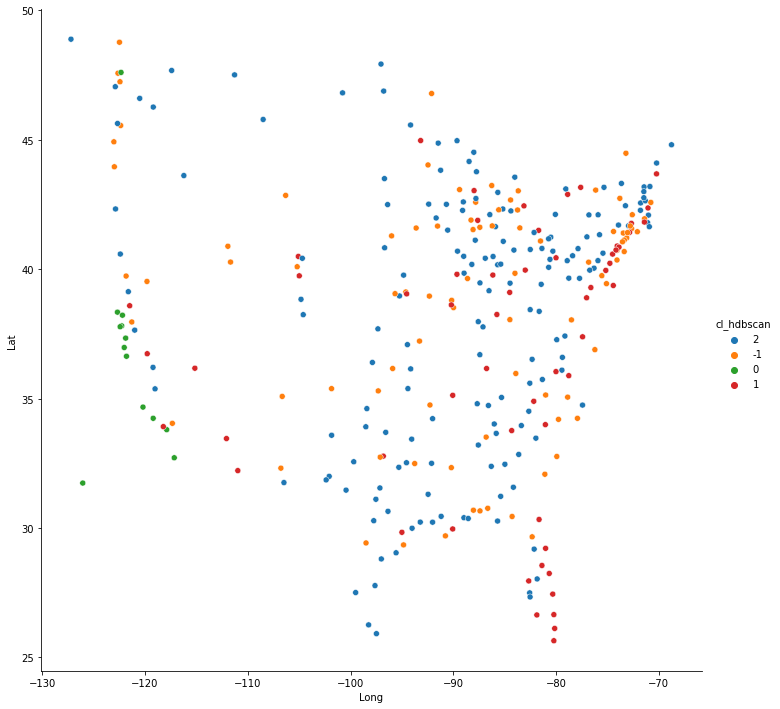

In [138]:
data['cl_hdbscan'] = [str(i) for i in cl_hdbscan.labels_]

sns.pairplot(x_vars="Long", 
             y_vars="Lat", 
             hue='cl_hdbscan',
             data=data, 
             height=10)
plt.show()

Как по мне, это лучшее, что можно добиться здесь (я старался минимизиоровать количество выбросов, но все равно их оказывается чуть меньше трети всех наблюдений.) Еще меня смущает, что группа 0 достаточно мала. Считаю, что это не очень подходящий метод кластеризации.

# Задание 6

В результате выполнения предыдущих пунктов вы должны получить 4 или больше разбиений объектов (по одному на каждый метод). Сравните их между собой, сделайте выводы о сходствах и различиях.
Оцените результаты каждой кластеризации, используя метрики, рассмотренные на занятиях (Silhouette и прочие).

Так как dbscan и hdbscan получились совсем неудачными (из-за большого числа выбросов), в таблицу корреляций их не включаю.

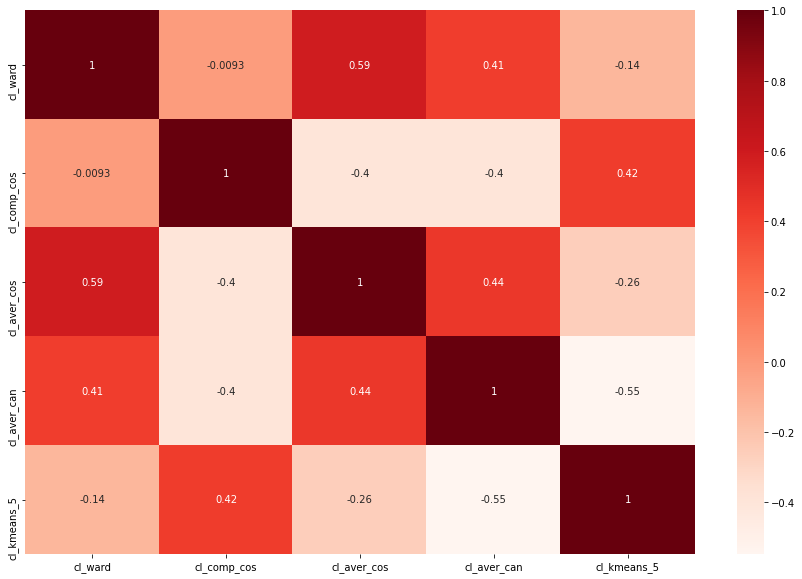

In [139]:
corr_mat = data[[x for x in data.columns if 'cl' in x]].corr()

plt.figure(figsize=(15, 10))
sns.heatmap(corr_mat, annot=True, cmap='Reds')
plt.show()

In [140]:
print("Silhouette Coefficient for cl_ward: %0.3f"
      % metrics.silhouette_score(data_for_clust, data['cl_ward']))
print("Silhouette Coefficient for cl_comp_cos: %0.3f"
      % metrics.silhouette_score(data_for_clust, data['cl_comp_cos']))
print("Silhouette Coefficient for cl_means_5: %0.3f"
      % metrics.silhouette_score(data_for_clust, data['cl_kmeans_5']))

Silhouette Coefficient for cl_ward: 0.139
Silhouette Coefficient for cl_comp_cos: 0.112
Silhouette Coefficient for cl_means_5: 0.176


Видно, что все коэффиценты близкие к 0, это говорит о том, что кластеры пересекаются и накладываются друг на друга. Самый большой коэфициент имеет cl_means_5.

Если говорить о иерархической кластеризации, то все разбиения имею такое включение: cl_average_can  ⊃  cl_ward  ⊃  cl_comp_cos.

**Итог:** самое удачное разбиение, считаю, было сделано методом kmeans 

# Задание 7

Выберите одно разбиение, наиболее подходящее на ваш взгляд. Предложите интерпретацию полученным кластерам или покажите, что этого сделать нельзя.

Возьмем разбиение методом Kmeans.

In [141]:
pd.concat([df.loc[data['cl_kmeans_5'] == i].mean() for i in range(0,5)],  axis=1)

,0,1,2,3,4
Climate,656.911111,522.447619,473.890909,481.474576,5.900615e+02
HousingCost,11155.711111,6957.409524,7824.145455,7991.915254,9.409723e+03
HlthCare,1062.133333,706.304762,706.727273,1004.728814,2.615400e+03
Crime,936.933333,795.095238,1214.872727,730.152542,1.240662e+03
Transp,4229.266667,3057.114286,3747.636364,5234.067797,5.521123e+03
Educ,2590.222222,2674.361905,2768.490909,2934.864407,3.127785e+03
Arts,3374.222222,1075.161905,1778.381818,1947.559322,8.602954e+03
Recreat,2677.222222,1369.304762,1787.527273,1637.559322,2.279046e+03
Econ,5676.577778,4788.971429,6898.727273,5256.796610,5.691938e+03
Pop,414416.800000,187174.019048,292025.963636,251829.559322,1.577778e+06


In [147]:
data['cl_kmeans_5'] = [str(i) for i in Z_kmeans.predict(data_for_clust)]

In [174]:
attributes = ['Climate', 'HousingCost', 'HlthCare', 'Transp', 'Educ', 'Arts', 'Recreat', 'Econ', 'Pop']

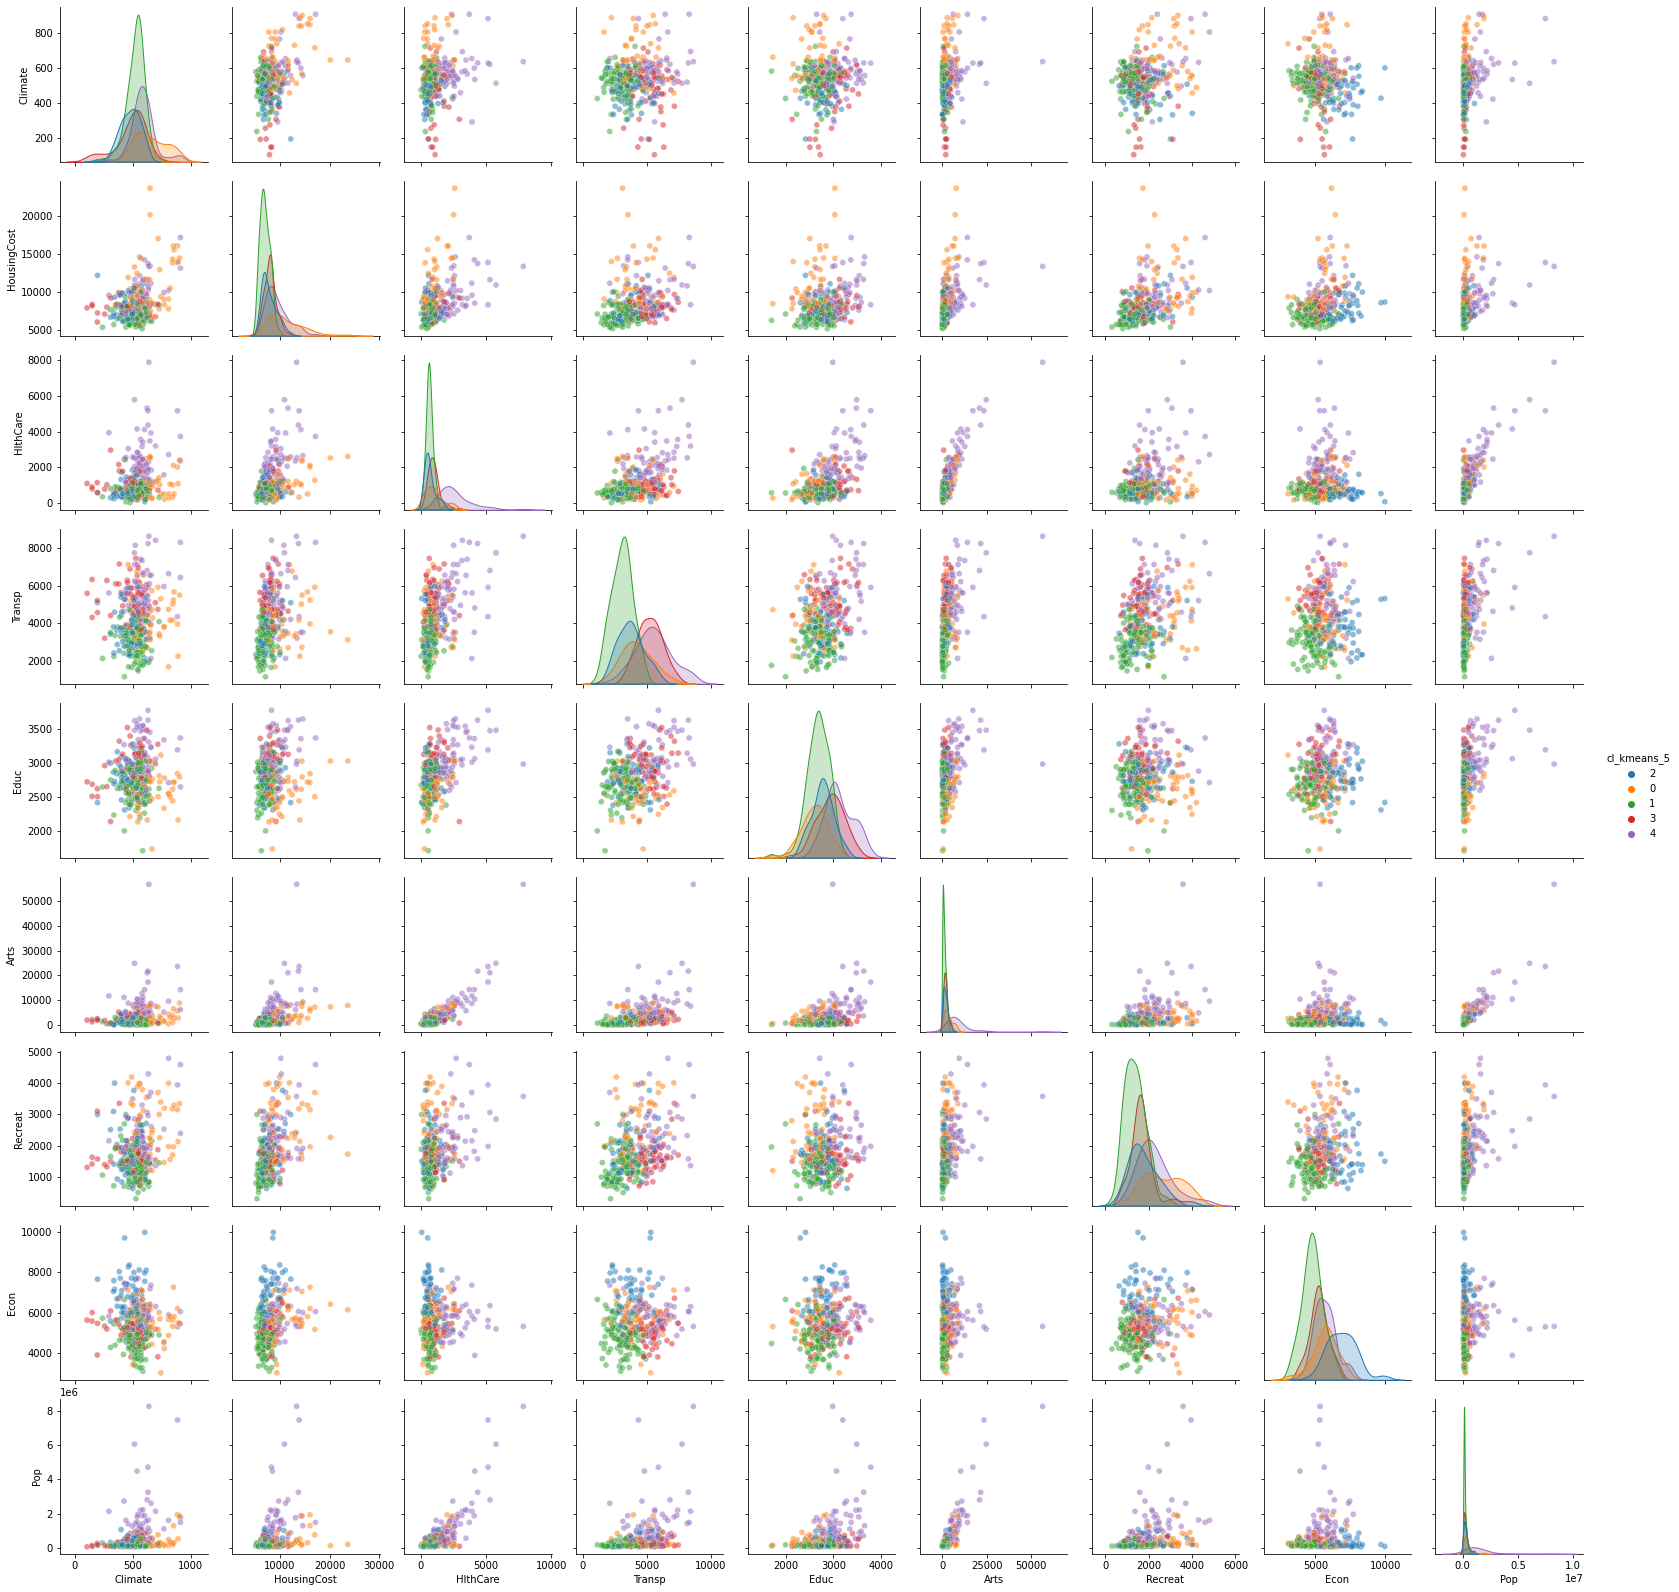

In [175]:
sns.pairplot(data[[x for x in attributes + ['cl_kmeans_5']]], hue="cl_kmeans_5", plot_kws={'alpha':0.5})


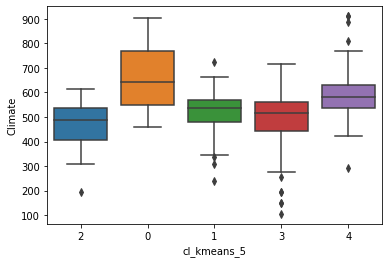

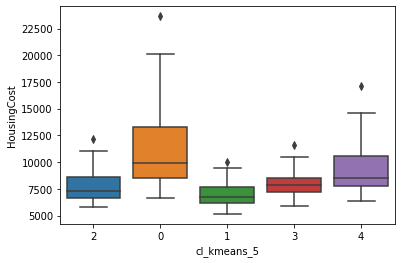

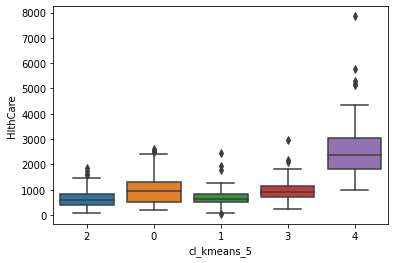

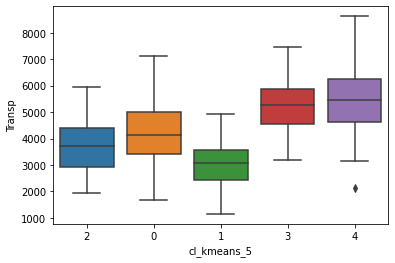

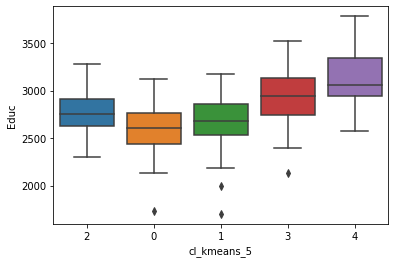

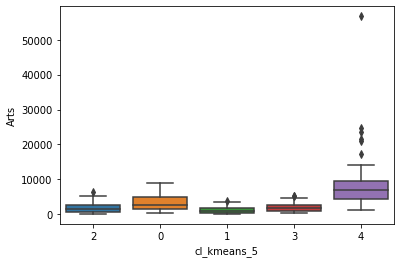

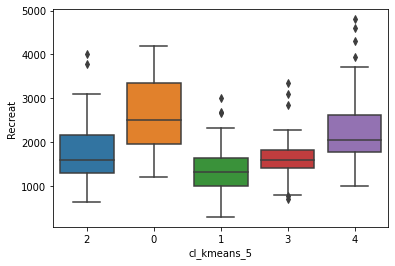

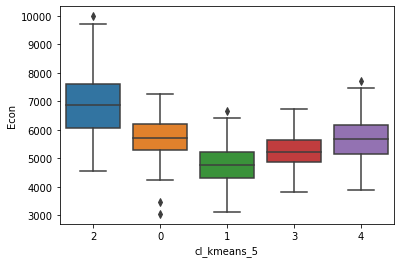

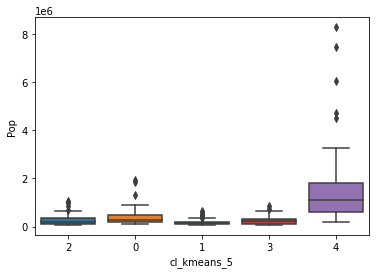

In [176]:
for i in attributes:
    sns.boxplot(y=data[i], x=data['cl_kmeans_5']);
    plt.show()

**Наблюдения для каждой группы:**

0 Группа: Самый высокие уровень Climate, Housing Cost, Recreat. HlthCare, Arts и Population на втором месте среди всех групп, Transport и Econ на третьем. Среднее значение уровня образования самое низкое среди всех групп. Предполагаю, что это города у побережий где-нибудь (где тепло и жилье дорогое).

1 Группа: не лидирует ни в одном аспекте. Climate на среднем уровне, Housing Cost, Hlthcare, Transp, Arts, Recreat, Econ, Pop самые низкие. Видимо, города в этой группе не очень хорошо развиты (группа аутсайдеров)

2 Группа: самый низкий Climate, довольно низкий Housing Cost, HlthCare, Transp, Recreat. Данная группа лидер в Econ и, также, она имеет довольно высокое Educ. Видимо, это довольно холодные страны, которые ориентируются на уровень образования и развитие экономики.

3 Группа: умеренный Climate, не самые высокие Housing Cost, среднее HlthCare, довольно выскоий (на 2 месте) Transp, высокий уровень Educ, Arts и Pop на 4 месте, довольно низкий Recreat и Econ. Видимо, это города с умеренным климатом, с большим количеством транспорта, высоким уровнем образования и неплохой медициной.

4 Группа: Высокий уроень Climate, HousingCost, Recreat, Econ, Pop; самый высокий уровень HlthCare, Transp, Educ, Arts. Видимо, это какие-то центральные города Америки (Лос-Анджелес, Нью-Йорк и прочее). Данная группа полная противоположность 1 группе.

# Задание 8

Оцените, как полученные кластеры распределены географически.
Оцените, как полученные кластеры распределены по штатам. Можно ли выделить какую-то зависимость (территориальную или для штатов)?
(Бонусное) Провизуализируйте распределение на карте США.

In [202]:
data = pd.read_csv('Data.txt', sep=' ')
data['cluster'] = Z_kmeans.predict(data_for_clust)
import folium 

m = folium.Map(
    location=[45.372, -101.6972],
    zoom_start=3.5,
    tiles='Stamen Terrain'
)

colors = {0: 'red', 1: 'yellow', 2: 'blue', 3: 'black', 4: 'white'}

for item in data.iterrows():
    x,y = x,y = item[1].Long, item[1].Lat
    folium.Circle(
        radius=10,
        location=[y, x],
        color = colors[item[1].cluster]
        #icon = folium.Icon(color = colors[item[1].cluster])
    ).add_to(m)

In [203]:
m

**Вывод исходя из карты:**

0 Группа: я угадал, что большинство городов находятся на побережье (думаю жилье дорогое из-за красивого вида там).

1 Группа: у данной группы тяжело выделить структуру, так как она все эт города разбросаны по США. Можно выделить, то, что большинство из них сконцентрированы на северо западе страны.

2 Группа: у данной группы я как-то промахнулся с погодой, так как все эти города находятся на юге США. Еще, важно заметить, что много городо из данной группы находятся на побережье.

3 Группа: города рапределены по всему штату, но большая концентрация рядом с Нью-Йорком и Чикаго, наверное поэтому там много транспорта. 

4 Группа: в данную группу попали все крупные города Америки, то есть мое предположение было верным.

Деление по штатам можно посмотреть на картинке. В целом, жизнь обстоит лучше в крупных городах (Нью-Йорк, Атланта, Лос-Анджелес и другие), а в мелких довольно низкие показатели(много мелких городов из желтой группы). Если делить по сторонам света, то лучше всего себя показывают востоные штаты (но, как видно по карте, их в дадафрейме большинство).